<h1 style="color: #8b5e3c;">Bucks Dataset Data Visualization</h1>
In this Jupyter Notebook, we look at all the Bucks Datasets that we have as well as the new ones we've created. The aim is to create data visualizations that will help us with understanding the relationships between features and uncover any insights.

<h3 style="color: #8b5e3c"> Determining Features of Interest in AccountLevel </h3>
We start off by looking at the features in the AccountLevel dataset, and seeing what features might be important to us, and then determining if the relationships between those features would lead us to deriving an answer for the business question. We begin my importing the datasets.

In [3]:
# importing the pandas library and IPython display
import pandas as pd
from IPython.display import display

# importing the account data frame
account_df = pd.read_csv("C:/Users/galvanm/python/BucksHackathon25/BucksDatasets/AccountLevelFilled.csv")
account_df_2024 = pd.read_csv("C:/Users/galvanm/python/BucksHackathon25/BucksDatasets/ALGLSL_2024.csv")
account_df_2023 = pd.read_csv("C:/Users/galvanm/python/BucksHackathon25/BucksDatasets/ALGLSL_2023.csv")

# viewing the data frame
display(account_df)

,Unnamed: 0,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement
0,0,2023,1,0,0,0,0,467.00,0,F,12.0,872.0,Low
1,1,2023,2,2,0,0,0,116.00,1,A,47.0,485.0,Low
2,2,2023,3,3,0,0,0,107.00,1,B,6.0,896.0,Low
3,3,2023,4,0,0,3,0,27.00,1,C,3.0,467.0,High
4,4,2023,5,0,0,2,0,14.00,1,A,4.0,582.0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44206,44206,2024,43025,2,0,0,0,2.00,1,A,26.0,290.0,High
44207,44207,2024,43026,0,0,3,0,6.34,1,D,6.0,266.0,Medium
44208,44208,2024,43027,0,0,6,0,41.00,1,Limited Data,9.0,392.0,High
44209,44209,2024,43028,2,0,0,0,68.00,1,A,6.0,898.0,High


In [4]:
# displaying the statistics and information of the dataset
display(account_df.info())
display((account_df.describe()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44211 entries, 0 to 44210
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             44211 non-null  int64  
 1   Season                 44211 non-null  int64  
 2   AccountNumber          44211 non-null  int64  
 3   SingleGameTickets      44211 non-null  int64  
 4   PartialPlanTickets     44211 non-null  int64  
 5   GroupTickets           44211 non-null  int64  
 6   STM                    44211 non-null  int64  
 7   AvgSpend               44211 non-null  float64
 8   GamesAttended          44211 non-null  int64  
 9   FanSegment             44211 non-null  object 
 10  DistanceToArena        44211 non-null  float64
 11  BasketballPropensity   44211 non-null  float64
 12  SocialMediaEngagement  44211 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 4.4+ MB


None

,Unnamed: 0,Season,AccountNumber,SingleGameTickets,PartialPlanTickets,GroupTickets,STM,AvgSpend,GamesAttended,DistanceToArena,BasketballPropensity
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,22105.000000,2023.645631,21116.251815,1.987582,0.836082,2.476669,0.049648,81.139832,1.262966,144.389586,693.940693
std,12762.760712,0.478327,12508.767388,15.080973,5.177241,178.657845,0.217220,94.742229,2.323687,330.119575,216.445880
min,0.000000,2023.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000
25%,11052.500000,2023.000000,10169.500000,0.000000,0.000000,0.000000,0.000000,30.000000,1.000000,8.000000,511.000000
50%,22105.000000,2024.000000,20923.000000,2.000000,0.000000,0.000000,0.000000,62.000000,1.000000,30.000000,719.000000
75%,33157.500000,2024.000000,31975.500000,3.000000,0.000000,0.000000,0.000000,100.000000,1.000000,87.000000,911.000000
max,44210.000000,2024.000000,43028.000000,3120.000000,120.000000,37200.000000,1.000000,3297.000000,41.000000,4240.000000,993.000000


<h2 style="color: #8b5e3c"> Average Spending vs Fan Segment (Violin Plot) </h2>
We would like to start our visualization by comparing the average spending against the fan segment. We would like to see the number of outliers. The reasoning is that we would like to know if we need to adjust the IQR for when we start plotting.

In [6]:
# importing the matplotlib library
import matplotlib.pyplot as plt

# importing the seaborn
import seaborn as sns

# defining the quartiles
Q1 = account_df_2023['AvgSpend'].quantile(0.25)
Q3 = account_df_2023['AvgSpend'].quantile(0.75)
interquartile_range = Q3 - Q1

# defining the lower and upper bounds
lower_bound = Q1 - (1.5 * interquartile_range)
upper_bound = Q3 + (1.5 * interquartile_range)

In [7]:
# setting up a outlier count
outlier_counts = {}

# counting all the outlier data points 
for segment, group in account_df_2023.groupby('FanSegment'):
    outlier_count = 0
    for value in group['AvgSpend']:
        if value < lower_bound or value > upper_bound:
            outlier_count = outlier_count + 1
    outlier_counts[segment] = round((outlier_count / len(group)) * 100, 2)

# printing out the number of outliers
print("Percentage of Outliers (2023): ", outlier_counts)

Percentage of Outliers (2023):  {'A': 5.75, 'B': 6.72, 'C': 4.79, 'D': 14.69, 'E': 5.26, 'F': 10.14, 'G': 8.17}


In [8]:
# defining the quartiles
Q1 = account_df_2024['AvgSpend'].quantile(0.25)
Q3 = account_df_2024['AvgSpend'].quantile(0.75)
interquartile_range = Q3 - Q1

# defining the lower and upper bounds
lower_bound = Q1 - (1.5 * interquartile_range)
upper_bound = Q3 + (1.5 * interquartile_range)

# setting up an outlier count
outlier_counts = {}

# counting all the outlier data points 
for segment, group in account_df_2024.groupby('FanSegment'):
    outlier_count = 0
    for value in group['AvgSpend']:
        if value < lower_bound or value > upper_bound:
            outlier_count = outlier_count + 1
    outlier_counts[segment] = round((outlier_count / len(group)) * 100, 2)

# printing out the number of outliers
print("Percentage of Outliers (2024): ", outlier_counts)

Percentage of Outliers (2024):  {'A': 2.24, 'B': 3.09, 'C': 6.98, 'D': 8.23, 'E': 12.18, 'F': 11.1, 'G': 10.9}


<h3 style="color: #8b5e3c"> Function for the Violin Plot </h3>
Before we plot out the violin plots, we define a function that is designed to plot out a violin plot. This will help remove code is that too repetitive and will help reduce the size of the cells that are meant for graphing out box plots.

In [10]:
# importing the sns library
import seaborn as sns

# function for graphing out a violin plot
def graph_violin_plot(fan_segment, y_axis_title, dataset, ax, season):
    sns.violinplot(y = y_axis_title, data=dataset, color='#00471B', ax=ax)
    ax.set_title(f"Average Spending Violin Plot for Segment {fan_segment} ({season})")
    ax.set_xlabel(fan_segment)
    ax.set_ylabel(y_axis_title)

<h3 style="color: #8b5e3c"> Visualizing the Average Spending vs Fan Segment of Bucks Fans </h3>
Now that we made the function, we now make a box plot for looking at the average spending and fan segments of Bucks Fans. Since we're comparing a categorical variable against a numerical variable, we decided to opt for a box plot to visualize the results. Here is the visualization as such.

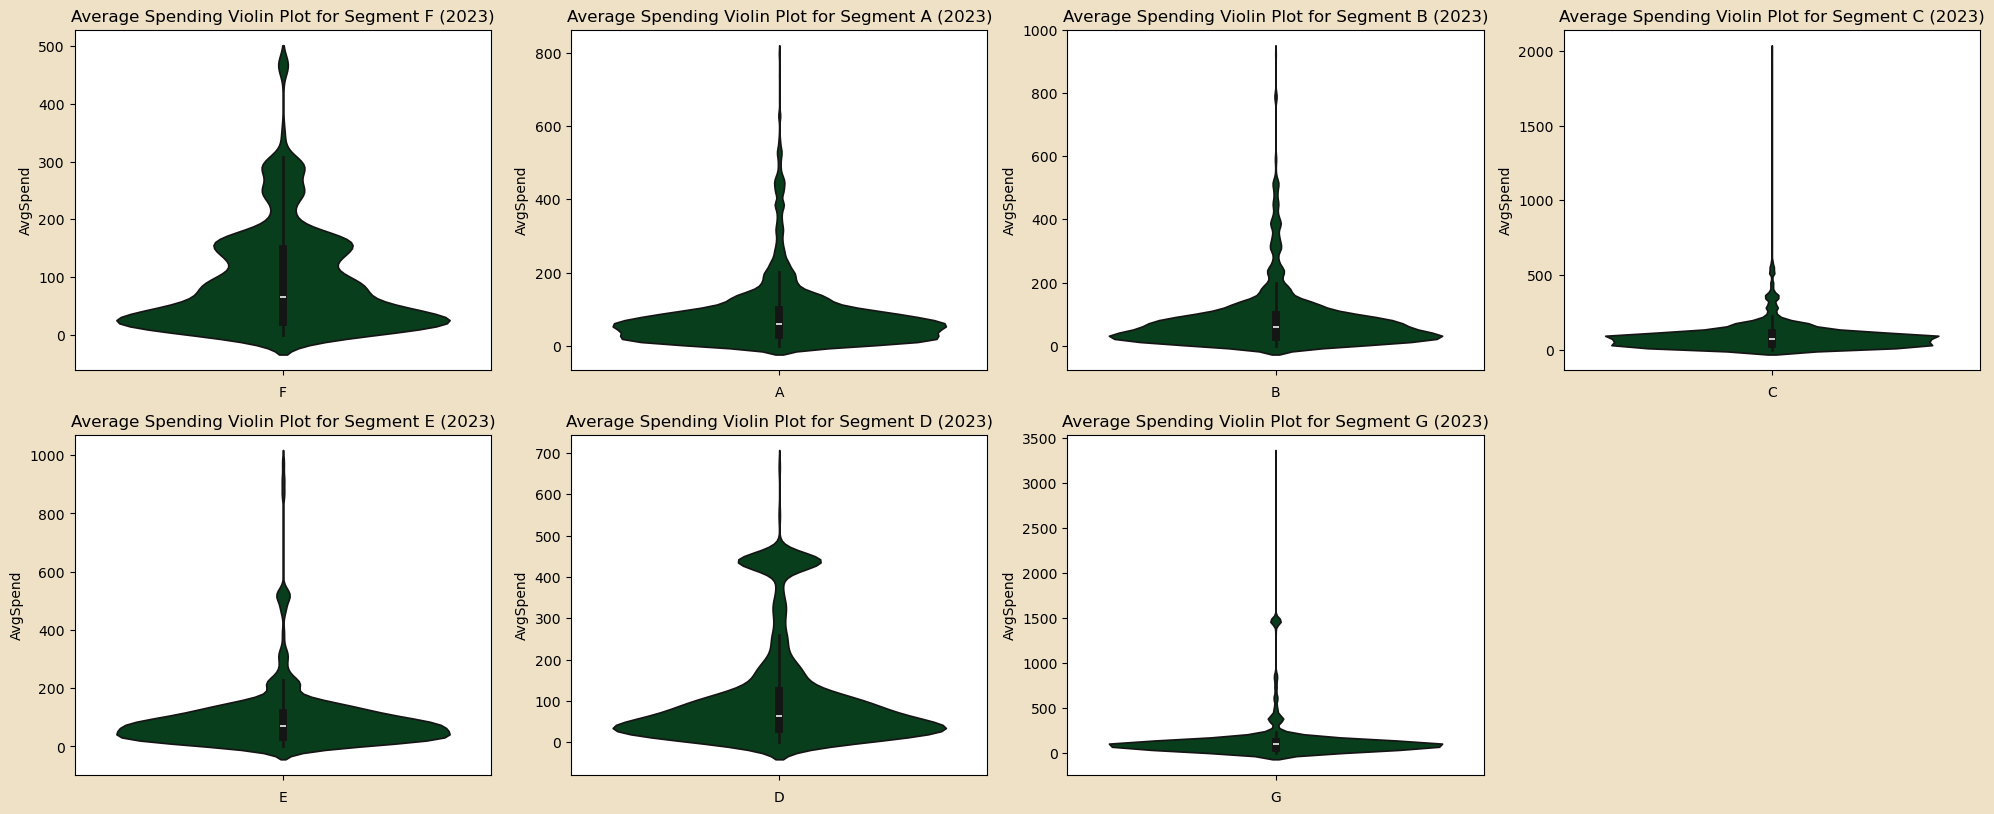

In [12]:
# finding unique value of the fan segments
fan_segments = account_df_2023['FanSegment'].unique()

# setting the number of rows and columns
rows = 3
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 12)) 

fig.patch.set_facecolor('#EEE1C6') 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, segment in enumerate(fan_segments):
    if i < len(axes):  
        segment_df = account_df_2023[account_df_2023['FanSegment'] == segment]
        graph_violin_plot(segment, "AvgSpend", segment_df, axes[i], '2023')
    
for j in range(len(fan_segments), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the figure
fig.savefig("C:/Users/galvanm/python/BucksHackathon25/BucksPlots/fan_segments_violin_plots_2023.png", dpi=300, bbox_inches='tight')

# displaying the plot
plt.show()

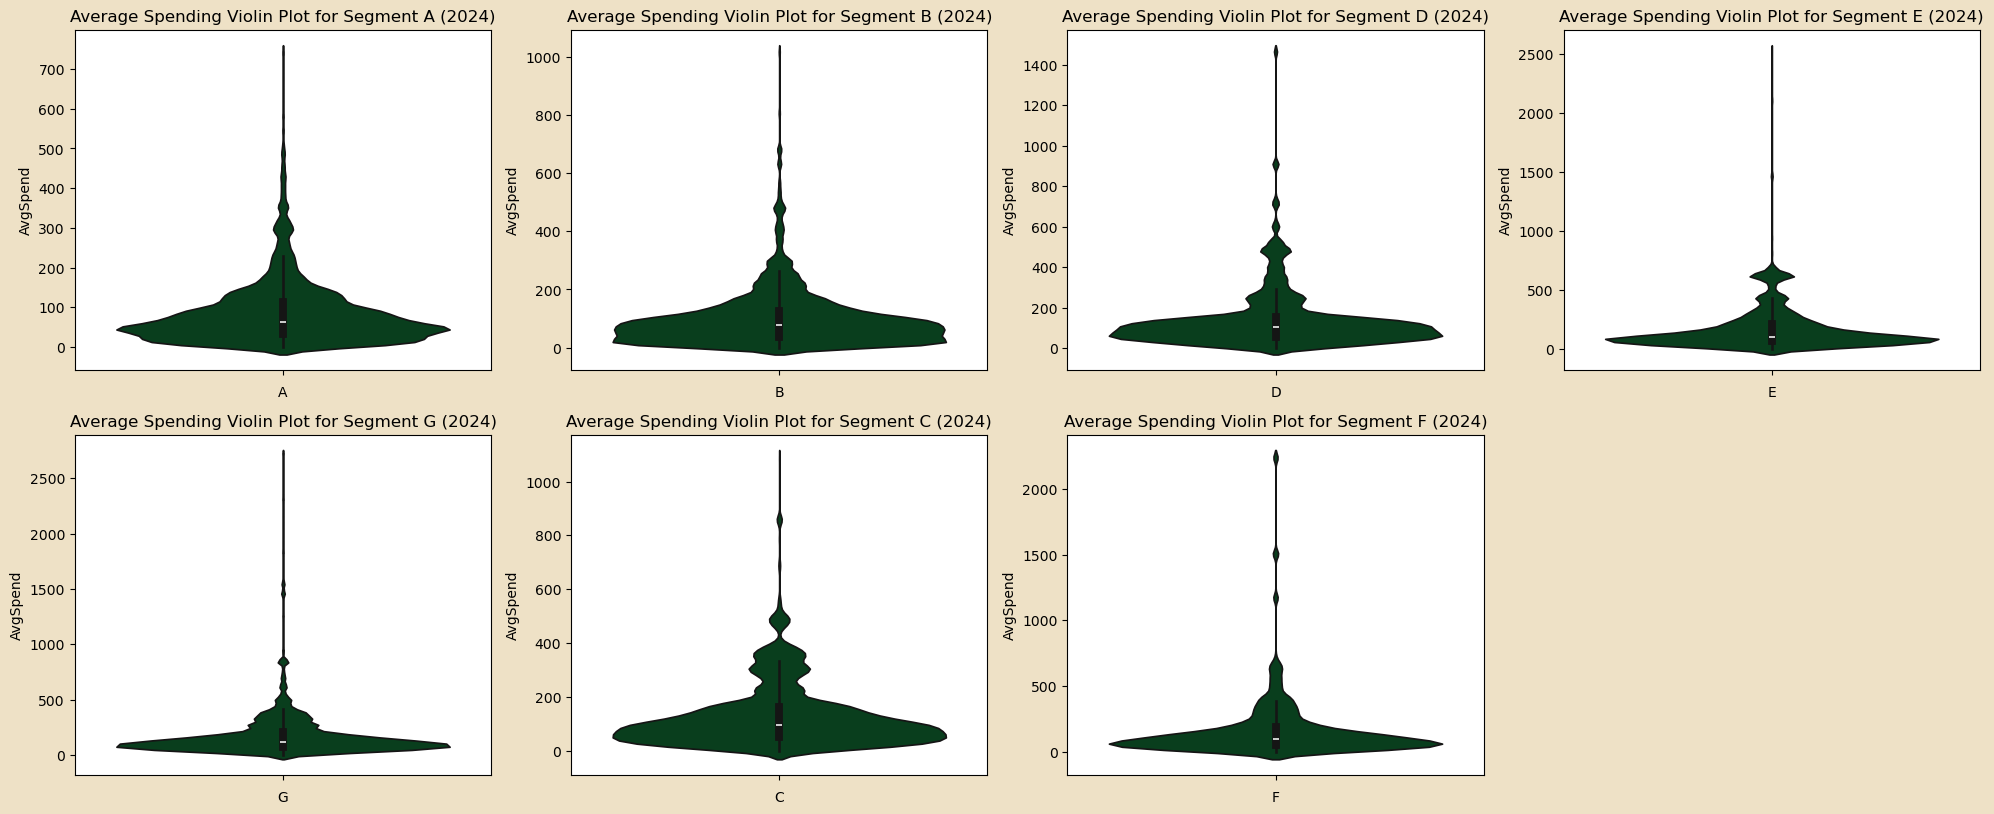

In [13]:
# finding unique value of the fan segments
fan_segments = account_df_2024['FanSegment'].unique()

# setting the number of rows and columns
rows = 3
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 12)) 

fig.patch.set_facecolor('#EEE1C6') 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, segment in enumerate(fan_segments):
    if i < len(axes):  
        segment_df = account_df_2024[account_df_2024['FanSegment'] == segment]
        graph_violin_plot(segment, "AvgSpend", segment_df, axes[i], '2024')
    
for j in range(len(fan_segments), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the figure
fig.savefig("C:/Users/galvanm/python/BucksHackathon25/BucksPlots/fan_segments_violin_plots_2024.png", dpi=300, bbox_inches='tight')

# displaying the plot
plt.show()

<h2 style="color: #8b5e3c"> Distance To Arena vs Basketball Propensity (Scatter Plot) </h2>
Next, we compare the DistanceToArena feature, which is the distance of residence to Fiserv Forum in miles against BasketballPropensity, which is the numerical value that represents basketball interest. It works from a scale of 0 to 1,000.

In [15]:
# checking for unexpected outliers in basketball propensity
max_propensity = account_df['BasketballPropensity'].dropna().unique().max()
print("Maximum Basketball Propensity: ", max_propensity)

# counting the number of null values in basketball propensity
na_propensity_count = account_df['BasketballPropensity'].isnull().sum()
print("Number of Null Values: ", na_propensity_count)

# counting the number of null values in distance to arena
na_distance_area_count = account_df['DistanceToArena'].isnull().sum()
print("Number of Null Values in Distance to Area: ", na_distance_area_count)

Maximum Basketball Propensity:  993.0
Number of Null Values:  0
Number of Null Values in Distance to Area:  0


<h3 style="color: #8b5e3c"> Function for the Scatter Plot </h3>
Before we plot out the scatter plots, we define a function that is designed to plot out a scatter plot. This will help remove code is that too repetitive and will help reduce the size of the cells that are meant for graphing out scatter plot.

In [17]:
# importing the numpy library
import numpy as np

# function for graphing out a scatter plot
def graph_scatter_plot(data_frame, x_label, y_label, season):

    data_frame['color_flag'] = 'Other'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(0, 12)),
        'color_flag'
    ] = 'Milwaukee County 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(0, 12)),
        'color_flag'
    ] = 'Milwaukee County 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(0, 12)),
        'color_flag'
    ] = 'Milwaukee County 800 to 1000'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(12, 540)),
        'color_flag'
    ] = 'Midwest 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(12, 540)),
        'color_flag'
    ] = 'Midwest 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(12, 540)),
        'color_flag'
    ] = 'Midwest 800 to 1000'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(540, 1288)),
        'color_flag'
    ] = 'US-Canada 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(540, 1288)),
        'color_flag'
    ] = 'US-Canada 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(540, 1288)),
        'color_flag'
    ] = 'US-Canada 800 to 1000'

    data_frame.loc[
        (data_frame[x_label].between(0, 400)) & (data_frame[y_label].between(1288, 4500)),
        'color_flag'
    ] = 'International 0 to 400'

    data_frame.loc[
        (data_frame[x_label].between(400, 800)) & (data_frame[y_label].between(1288, 4500)),
        'color_flag'
    ] = 'International 400 to 800'

    data_frame.loc[
        (data_frame[x_label].between(800, 1000)) & (data_frame[y_label].between(1288, 4500)),
        'color_flag'
    ] = 'International 800 to 1000'

    sns.scatterplot(data=data_frame, x=x_label, y=y_label,  hue='color_flag',  
            palette={'Milwaukee County 0 to 400': '#4D7C5A', 
                    'Milwaukee County 400 to 800' : '#195C35',
                    'Milwaukee County 800 to 1000' : '#2E8B57',
                    'Midwest 0 to 400':'#C19A6B',
                    'Midwest 400 to 800':'#8B5E3C',
                    'Midwest 800 to 1000':'#5F3C23',
                    'US-Canada 0 to 400':'#A7D3F4',
                    'US-Canada 400 to 800':'#3399CC',
                    'US-Canada 800 to 1000':'#0077C0',
                    'International 0 to 400':'#FBF6ED',
                    'International 400 to 800':'#F5EBD9',
                    'International 800 to 1000':'#EEE1C6',
                    'Other' : '#d3d3d3'
        }
    )
    #fig, ax = plt.subplots(figsize=(6,4))


    sns.set_style( {'figure.facecolor': '#EEE1C6'})
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.yticks(np.arange(0, 5000, 500))
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.title(f"{x_label} vs {y_label} Scatterplot ({season})")

    # saving the figure
    plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_distance_scatterplot_{season}.png", dpi=300, bbox_inches='tight')

<h3 style="color: #8b5e3c"> Plotting out the Scatter Plot </h3>
It is worth noting that there are missing values in both features. I will attempt to plot out a scatter plot, which by default should ingore the missing values. It is worth noting that later on, I will attempt at imputing the missing values and then plot out a new scatter plot. Another thing worth noting is that since we divided basketball propensity and DistanceToArena into categories, we can then plot out a heat map.

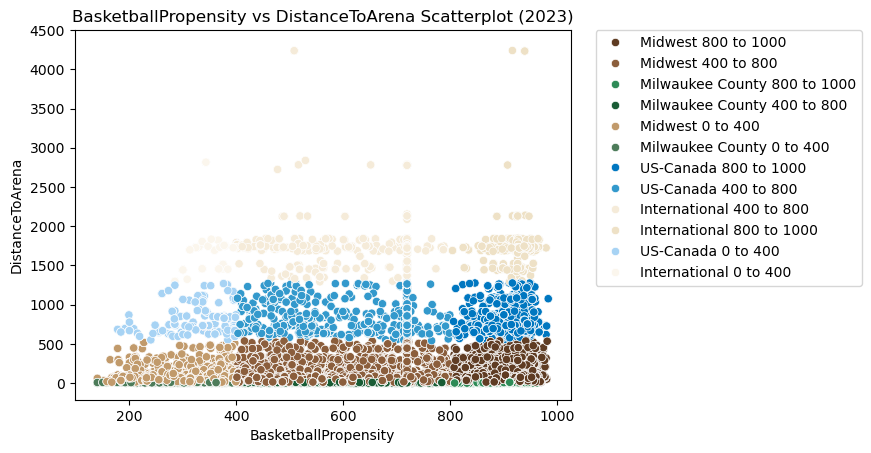

In [19]:
graph_scatter_plot(account_df_2023, 'BasketballPropensity', 'DistanceToArena', '2023')

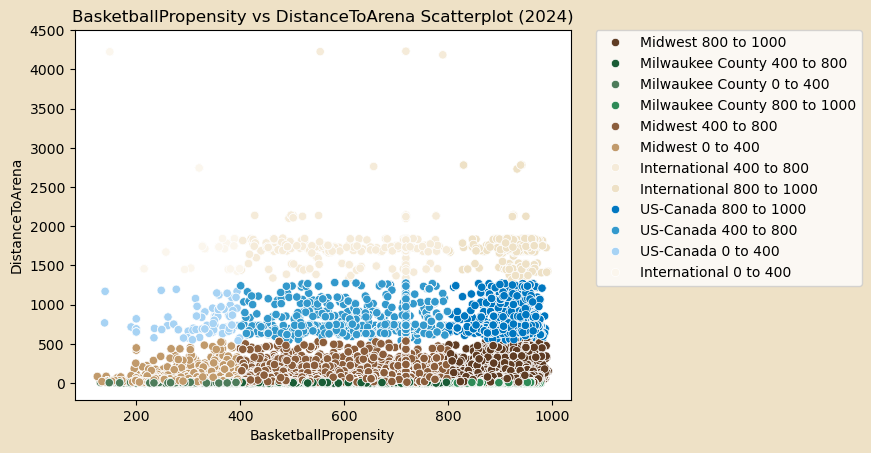

In [20]:
graph_scatter_plot(account_df_2024, 'BasketballPropensity', 'DistanceToArena', '2024')

<h2 style="color: #8b5e3c"> Distance To Arena vs Basketball Propensity (Box Plot) </h2>
To allow us to derive a better understanding of the relationship between Distance To Arena and Basketball Propensity, I will categorize the levels of interest in Milwaukee Bucks games by Fans as 'Low', 'Medium' and 'High', which is from 0 to 400, 400 to 800 and 800 to 1000. For basketball propensity, I will categorize according to distance from Fiserv Forum, as shown in the legend below.

In [22]:
# creating a new copy of the data frame
account_df_copy_2023 = account_df_2023.copy()
account_df_copy_2024 = account_df_2024.copy()

# categorizing the basketball propensity feature into three different categories
for propensity_score in account_df_copy_2023.index:
    score = account_df_copy_2023.at[propensity_score, 'BasketballPropensity']
    if(0 <= score < 400):
        account_df_copy_2023.at[propensity_score, 'BasketballPropensity'] = 'Low'
    elif(400 <= score < 800):
        account_df_copy_2023.at[propensity_score, 'BasketballPropensity'] = 'Medium'
    elif(score >=  800):
        account_df_copy_2023.at[propensity_score, 'BasketballPropensity'] = 'High'

for propensity_score in account_df_copy_2024.index:
    score = account_df_copy_2024.at[propensity_score, 'BasketballPropensity']
    if(0 <= score < 400):
        account_df_copy_2024.at[propensity_score, 'BasketballPropensity'] = 'Low'
    elif(400 <= score < 800):
        account_df_copy_2024.at[propensity_score, 'BasketballPropensity'] = 'Medium'
    elif(score >=  800):
        account_df_copy_2024.at[propensity_score, 'BasketballPropensity'] = 'High'

# categorizing the distance to arena feature into different categories
for arena_distance in account_df_copy_2023.index:
    distance = account_df_copy_2023.at[arena_distance, 'DistanceToArena']
    if(0 <= distance < 12):
        account_df_copy_2023.at[arena_distance, 'DistanceToArena'] = 'Milwaukee'
    if(12 <= distance < 540):
        account_df_copy_2023.at[arena_distance, 'DistanceToArena'] = 'Midwest'
    if(540 <= distance < 1288):
        account_df_copy_2023.at[arena_distance, 'DistanceToArena'] = 'US-Canada'
    if(1288 <= distance < 4500):
        account_df_copy_2023.at[arena_distance, 'DistanceToArena'] = 'International'

for arena_distance in account_df_copy_2024.index:
    distance = account_df_copy_2024.at[arena_distance, 'DistanceToArena']
    if(0 <= distance < 12):
        account_df_copy_2024.at[arena_distance, 'DistanceToArena'] = 'Milwaukee'
    if(12 <= distance < 540):
        account_df_copy_2024.at[arena_distance, 'DistanceToArena'] = 'Midwest'
    if(540 <= distance < 1288):
        account_df_copy_2024.at[arena_distance, 'DistanceToArena'] = 'US-Canada'
    if(1288 <= distance < 4500):
        account_df_copy_2024.at[arena_distance, 'DistanceToArena'] = 'International'
        
# viewing the copy of the data frame
account_df_copy_2023.head(3)
account_df_copy_2024.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\3774901394.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  account_df_copy_2023.at[propensity_score, 'BasketballPropensity'] = 'High'
C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\3774901394.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'High' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  account_df_copy_2024.at[propensity_score, 'BasketballPropensity'] = 'High'
C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\3774901394.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Midwest' has dtype incompatible with float64, please explic

,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,0,A,Midwest,High,High,0,Midwest 800 to 1000
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,0,A,Midwest,High,High,0,Midwest 800 to 1000
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,...,2,0,4.32,0,B,Milwaukee,Medium,Medium,0,Milwaukee County 400 to 800


<h3 style="color: #8b5e3c"> Plotting Out a Heatmap </h3>
Now, we will plot a heat map, as we have converted the the two features into categorical features. Since we're plotting two categorical features against each other, it is worth plotting a heatmap, and we hope creating this heat map will help uncover more insights into our data.
 

In [24]:
# dropping all missing values
filtered_df_2023 = account_df_copy_2023.dropna(subset=['DistanceToArena', 'BasketballPropensity'])
filtered_df_2024 = account_df_copy_2024.dropna(subset=['DistanceToArena', 'BasketballPropensity'])

# finding all the unique values in DistanceToArena
print("Unique Values of DistanceToArena (2023)", filtered_df_2023['DistanceToArena'].unique())
print("Unique Values of DistanceToArena (2024)", filtered_df_2024['DistanceToArena'].unique())

# finding all the unique values in BasketBallPropensity
print("Unique Values of BasketBallPropensity (2023)", filtered_df_2023['BasketballPropensity'].unique())
print("Unique Values of BasketBallPropensity (2024)", filtered_df_2024['BasketballPropensity'].unique())

print("\n")

# finding count of unique values in DistanceToArena
distance_count = filtered_df_2023['DistanceToArena'].value_counts()
print('2023: ', distance_count)

distance_count = filtered_df_2024['DistanceToArena'].value_counts()
print('2024: ', distance_count)

print("\n")

# finding count of unique values in BasketBallPropensity
propensity_count = filtered_df_2023['BasketballPropensity'].value_counts()
print('2023: ', propensity_count)

propensity_count = filtered_df_2024['BasketballPropensity'].value_counts()
print('2024: ', propensity_count)

Unique Values of DistanceToArena (2023) ['Midwest' 'Milwaukee' 'US-Canada' 'International']
Unique Values of DistanceToArena (2024) ['Midwest' 'Milwaukee' 'International' 'US-Canada']
Unique Values of BasketBallPropensity (2023) ['High' 'Medium' 'Low']
Unique Values of BasketBallPropensity (2024) ['High' 'Medium' 'Low']


2023:  DistanceToArena
Midwest          41928
Milwaukee        22988
US-Canada         6113
International     3741
Name: count, dtype: int64
2024:  DistanceToArena
Midwest          204025
Milwaukee        193954
US-Canada         12667
International      8468
Name: count, dtype: int64


2023:  BasketballPropensity
Medium    47725
High      15760
Low       11285
Name: count, dtype: int64
2024:  BasketballPropensity
High      216992
Medium    181552
Low        20570
Name: count, dtype: int64


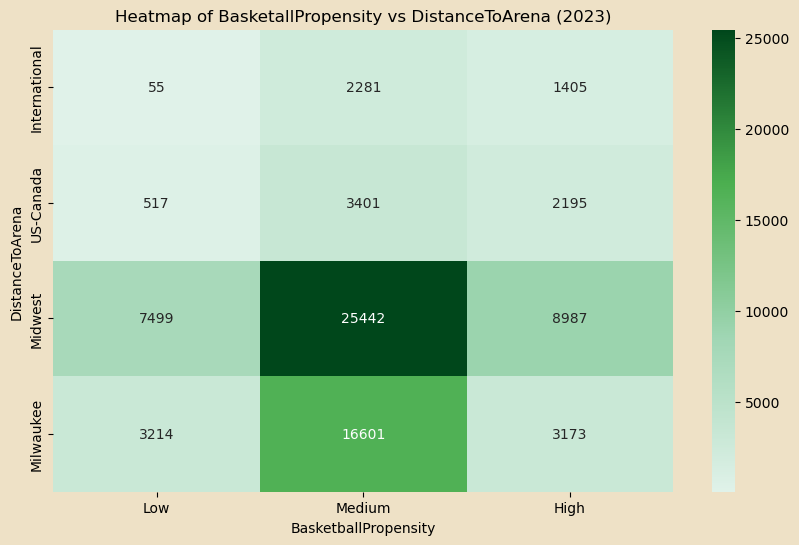

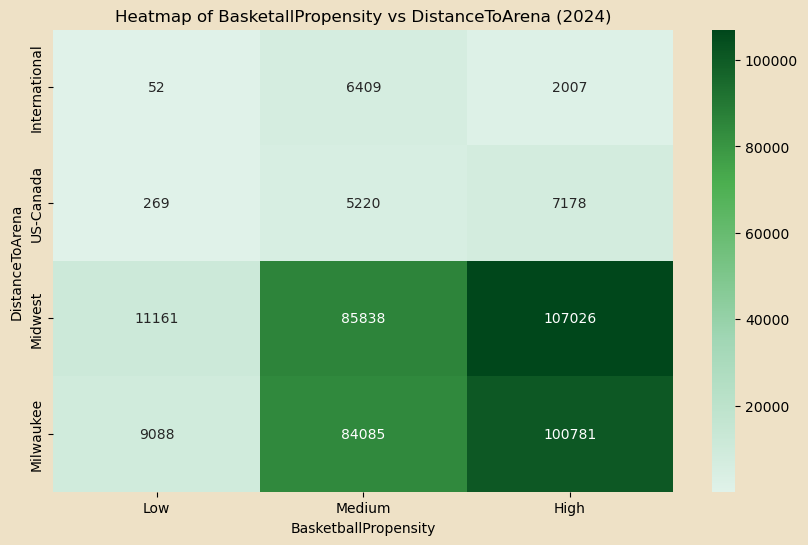

In [25]:
# importing the color map library
from matplotlib.colors import LinearSegmentedColormap

# order of axes
x_order = ['Low', 'Medium', 'High']
y_order = ['Milwaukee', 'Midwest', 'US-Canada', 'International'][::-1]

# producing a frequency table
heatmap_23 = pd.crosstab(filtered_df_2023['DistanceToArena'], filtered_df_2023['BasketballPropensity'])
heatmap_23 = heatmap_23.reindex(index=y_order, columns=x_order)

heatmap_24 = pd.crosstab(filtered_df_2024['DistanceToArena'], filtered_df_2024['BasketballPropensity'])
heatmap_24 = heatmap_24.reindex(index=y_order, columns=x_order)

# defining a color map scheme
bucks_cmap = LinearSegmentedColormap.from_list("bucks_green",  ["#E0F2E9", "#A0D6B4", "#4CAF50", "#00471B"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_style( {'figure.facecolor': '#EEE1C6'})

sns.heatmap(heatmap_23, annot=True, fmt="d", cmap=bucks_cmap)
plt.title("Heatmap of BasketallPropensity vs DistanceToArena (2023)")

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_distance_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')
plt.show()


# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_style( {'figure.facecolor': '#EEE1C6'})

sns.heatmap(heatmap_24, annot=True, fmt="d", cmap=bucks_cmap)
plt.title("Heatmap of BasketallPropensity vs DistanceToArena (2024)")

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_distance_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')
plt.show()


<h2 style="color: #8b5e3c"> SocialMediaEngagement vs BasketballPropensity (Box Plot) </h2>
Next up, we now compare the SocialMediaEngagement of Fans against the BasketballPropensity. As Basketball propensity is a numerical feature, I would like to focus on making box plots at first to see what kind of relationships can be dervied from the data visualization.

In [27]:
# dropping all missing values
filtered_df_two_23 = account_df_2023.dropna(subset=['SocialMediaEngagement', 'BasketballPropensity'])
filtered_df_two_23.head(3)

filtered_df_two_24 = account_df_2024.dropna(subset=['SocialMediaEngagement', 'BasketballPropensity'])
filtered_df_two_24.head(3)

,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,0,A,47.0,916.0,High,0,Midwest 800 to 1000
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,0,A,47.0,916.0,High,0,Midwest 800 to 1000
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,...,2,0,4.32,0,B,4.0,502.0,Medium,0,Milwaukee County 400 to 800


<h3 style="color: #8b5e3c"> Function for Boxplot </h3>
Now, we define a function for the box plot. We use this function to allow us to create box plots as this eliminates the need to use the same code multiple times.

In [29]:
# function to produce a box plot
def create_box_plot(dataframe, x, y, title, filename):
    fig, ax = plt.subplots(figsize=(10,6))
    fig.patch.set_facecolor('#EEE1C6') 
    sns.boxplot(data=dataframe, x=x, y=y, color="#EEE1C6")
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/{filename}.png", dpi=300, 
            bbox_inches='tight')
    plt.show()

<h3 style="color: #8b5e3c"> Plotting out the Boxplots </h3>
Given that we've defined the function for producing box plots, we now move to create a box plot that helps to determine the relationship between basketball propensity and social media engagement.

Median of Low Social Media Engagement (2023):  719.0
Median of Low Social Media Engagement (2024):  830.0
Median of Medium Social Media Engagement (2023):  719.0
Median of Medium Social Media Engagement (2024):  845.0
Median of High Social Media Engagement(2023):  719.0
Median of High Social Media Engagement(2024):  807.0


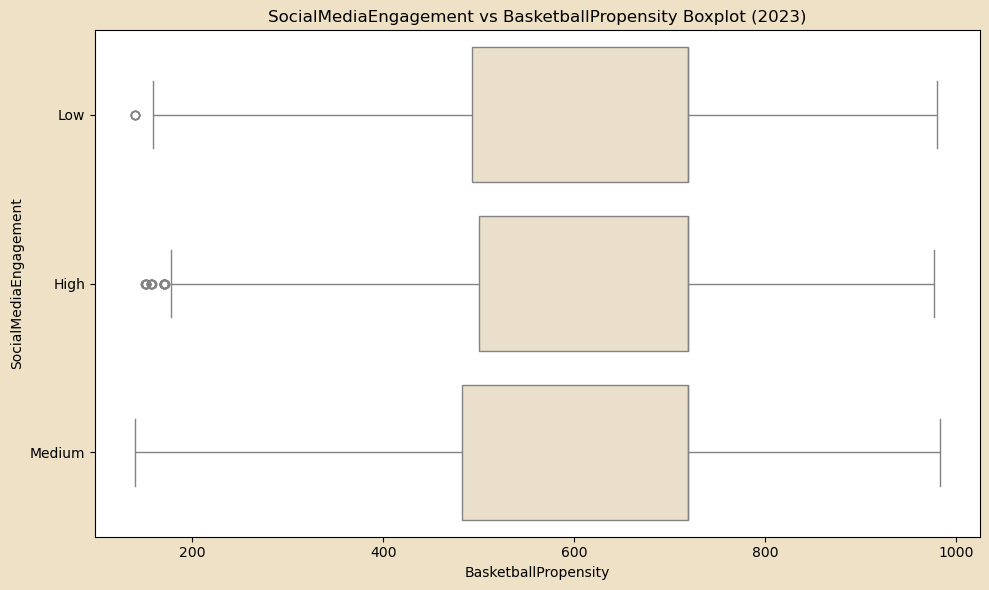

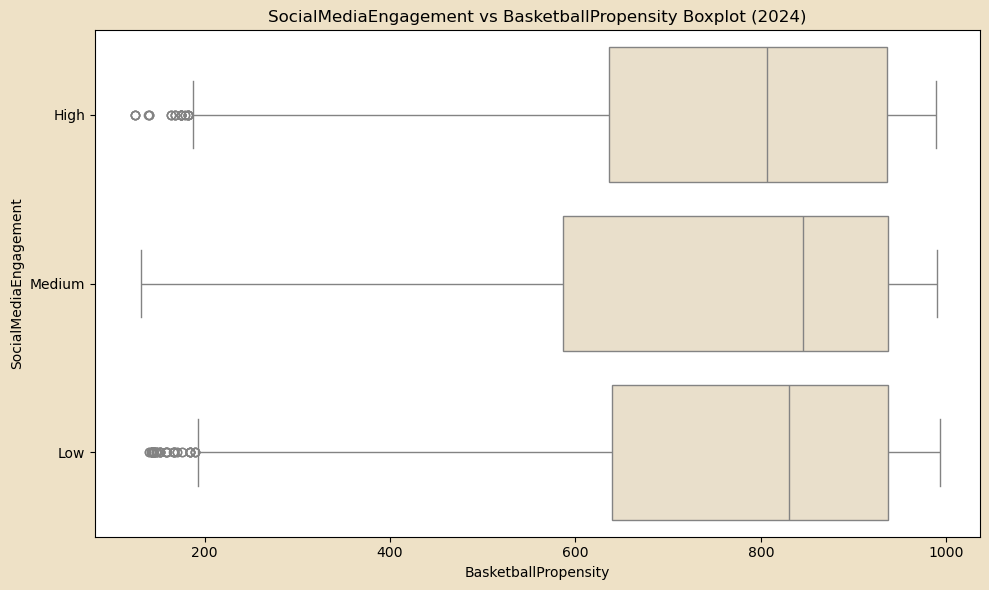

In [31]:
# calculating the median values of low social media category
subset_low = filtered_df_two_23[
    (filtered_df_two_23['SocialMediaEngagement'] == 'Low')
]
print("Median of Low Social Media Engagement (2023): " , subset_low['BasketballPropensity'].median())

subset_low = filtered_df_two_24[
    (filtered_df_two_24['SocialMediaEngagement'] == 'Low')
]
print("Median of Low Social Media Engagement (2024): " , subset_low['BasketballPropensity'].median())

# calculating the median values of medium social media category
subset_median = filtered_df_two_23[
    (filtered_df_two_23['SocialMediaEngagement'] == 'Medium')
]
print("Median of Medium Social Media Engagement (2023): " , subset_median['BasketballPropensity'].median())

subset_median = filtered_df_two_24[
    (filtered_df_two_24['SocialMediaEngagement'] == 'Medium')
]
print("Median of Medium Social Media Engagement (2024): " , subset_median['BasketballPropensity'].median())

# calculating the median values of high social media category
subset_high = filtered_df_two_23[
    (filtered_df_two_23['SocialMediaEngagement'] == 'High')
]
print("Median of High Social Media Engagement(2023): " , subset_high['BasketballPropensity'].median())

subset_high = filtered_df_two_24[
    (filtered_df_two_24['SocialMediaEngagement'] == 'High')
]
print("Median of High Social Media Engagement(2024): " , subset_high['BasketballPropensity'].median())

# plotting out the box plot
create_box_plot(filtered_df_two_23, 'BasketballPropensity', 'SocialMediaEngagement',
                "SocialMediaEngagement vs BasketballPropensity Boxplot (2023)", 'sme_vs_propensity_boxplot_2023.png')
create_box_plot(filtered_df_two_24, 'BasketballPropensity', 'SocialMediaEngagement',
                "SocialMediaEngagement vs BasketballPropensity Boxplot (2024)", 'sme_vs_propensity_boxplot_2023.png')

<h2 style="color: #8b5e3c"> FanSegment vs DistanceToArena (Violin Plot) </h2>
We now move on to comparing FanSegment, which is a categorical feature, against DistanceToArena, which is a numerical feature. We will create box plots to see if there are relationships to derive.


In [33]:
# function for graphing out a violin plot
def plot_violin_plot(fan_segment, y_axis_title, dataset, ax, title):
    sns.violinplot(y = y_axis_title, data=dataset, color='#6DA544', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(fan_segment)
    ax.set_ylabel(y_axis_title)

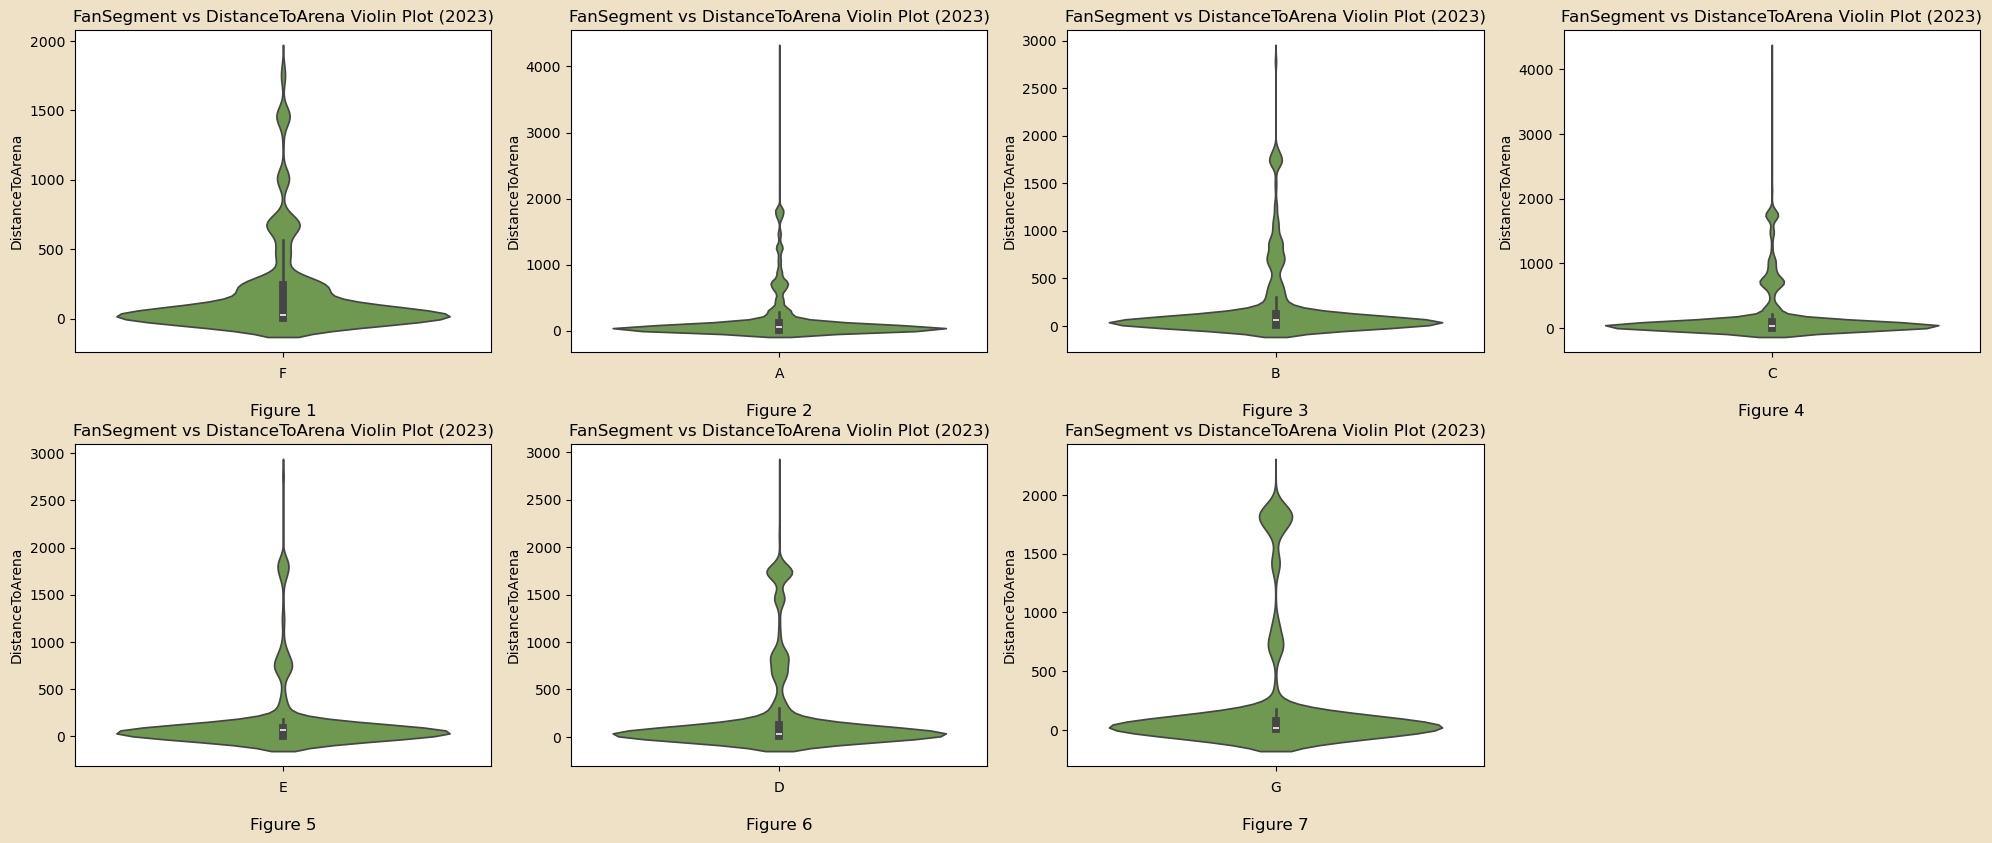

In [34]:
# finding unique value of the fan segments
fan_segments_23 = account_df_2023['FanSegment'].unique()
fan_segments_24 = account_df_2024['FanSegment'].unique()

# setting the number of rows and columns
rows = 3
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 12)) 
fig.patch.set_facecolor('#EEE1C6') 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, segment in enumerate(fan_segments_23):
    if i < len(axes):  
        segment_df = account_df_2023[account_df_2023['FanSegment'] == segment]
        plot_violin_plot(segment, "DistanceToArena", segment_df, axes[i], 
                          "FanSegment vs DistanceToArena Violin Plot (2023)")
        axes[i].text(
            0.5,           
            -0.2,          
            f"Figure {i+1}",
            transform=axes[i].transAxes,
            ha='center',
            fontsize=12,    
            clip_on=False   
        )
    
for j in range(len(fan_segments_23), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the figure
fig.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/segment_vs_distance_plots_2023.png", dpi=300, bbox_inches='tight')

# displaying the plot
plt.show()



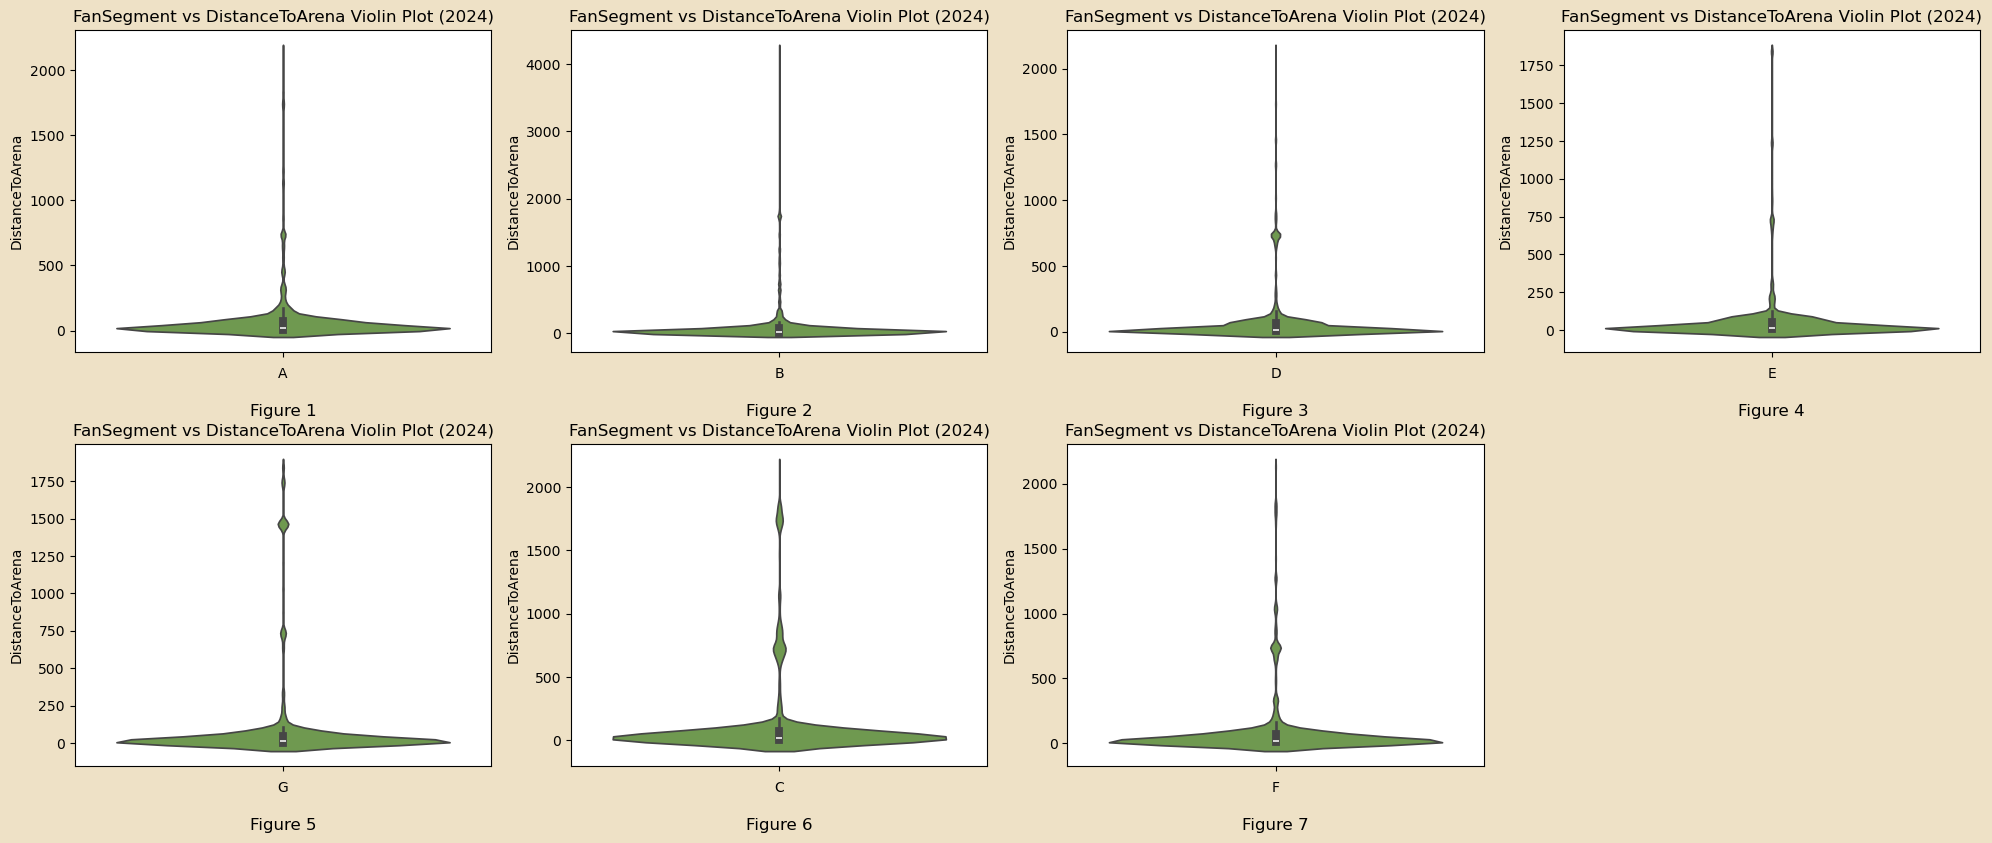

In [35]:
# setting the number of rows and columns
rows = 3
columns = 4

# creating the figure
fig, axes = plt.subplots(rows, columns, figsize=(20, 12)) 
fig.patch.set_facecolor('#EEE1C6') 

# flatten the axes array
axes = axes.ravel()  

# using a for loop to greate the graph
for i, segment in enumerate(fan_segments_24):
    if i < len(axes):  
        segment_df = account_df_2024[account_df_2024['FanSegment'] == segment]
        plot_violin_plot(segment, "DistanceToArena", segment_df, axes[i], 
                          "FanSegment vs DistanceToArena Violin Plot (2024)")
        axes[i].text(
            0.5,           
            -0.2,          
            f"Figure {i+1}",
            transform=axes[i].transAxes,
            ha='center',
            fontsize=12,    
            clip_on=False   
        )
    
for j in range(len(fan_segments_24), len(axes)):
    fig.delaxes(axes[j])

# displaying the plots
plt.tight_layout()

# saving the figure
fig.savefig("C:/Users/galvanm/python/BucksHackathon25/BucksPlots/segment_vs_distance_plots_2024.png", dpi=300, bbox_inches='tight')

# displaying the plot
plt.show()

<h3 style="color: #8b5e3c"> Using Heat Map as an Alternative </h3>
Looking at these violin plots, we can see that most of them are very similar to each other. As a result we wanted to see what it would be like to convert the DistanceToArena feature into a categorical feature and then create a heatmap.

Number of Midwest G:  8621


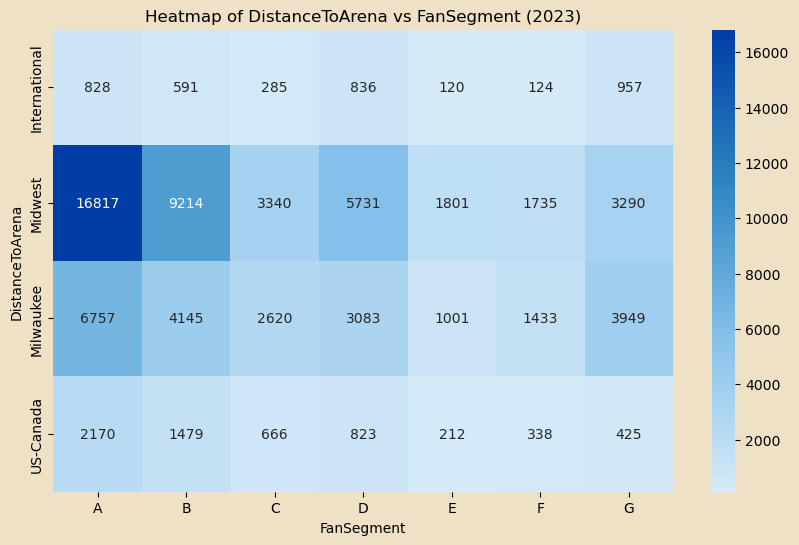

In [37]:
# producing a frequency table
heatmap = pd.crosstab(filtered_df_2023['DistanceToArena'], filtered_df_2023['FanSegment'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_style( {'figure.facecolor': '#EEE1C6'})

sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs FanSegment (2023)")

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/segment_vs_distance_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

# calculating the number of values just to ensure we did this right
subset_low = filtered_df_2023[
    (filtered_df_2023['FanSegment'] == 'G')
]
print("Number of Midwest G: " , subset_low['DistanceToArena'].count())

Number of Midwest G:  188398


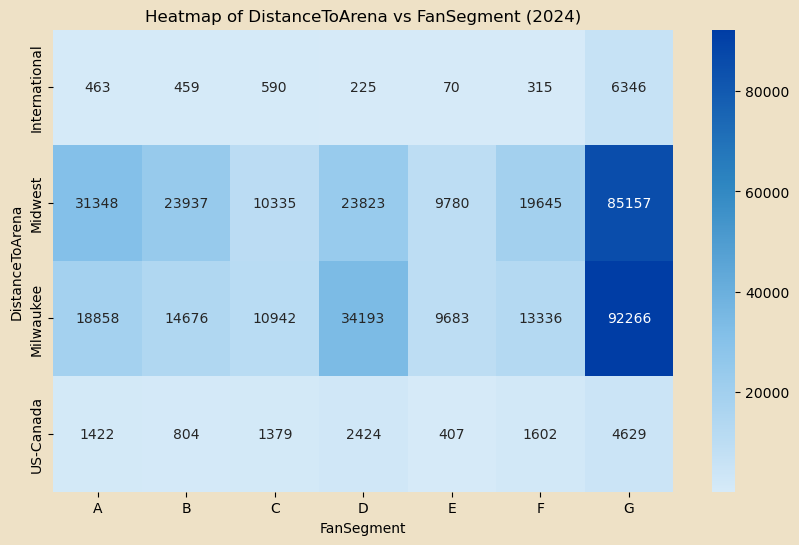

In [38]:
# producing a frequency table
heatmap = pd.crosstab(filtered_df_2024['DistanceToArena'], filtered_df_2024['FanSegment'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_style( {'figure.facecolor': '#EEE1C6'})
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs FanSegment (2024)")

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/segment_vs_distance_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

# calculating the number of values just to ensure we did this right
subset_low = filtered_df_2024[
    (filtered_df_2024['FanSegment'] == 'G')
]
print("Number of Midwest G: " , subset_low['DistanceToArena'].count())

<h2 style="color: #8b5e3c"> AvgSpend vs SocialMediaEngagement (Box Plot) </h2>
Next, we would like to create a box plot, as we would like to compare AvgSpend, which is a numerical feature against SocialMediaEngagement, which is a categorical feature. We would like to see if we can derive any relationships between these variables.

In [40]:
# function to produce a box plot
def plot_box_plot(dataframe, x, y, title, filename):
    plt.figure(figsize=(10,6))
    sns.boxplot(data=dataframe, x=x, y=y, color="#EEE1C6", showfliers=False)
    sns.set_style( {'figure.facecolor': '#EEE1C6'})
    plt.title(title)
    plt.tight_layout()
    plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/{filename}.png", dpi=300, 
            bbox_inches='tight')
    plt.show()

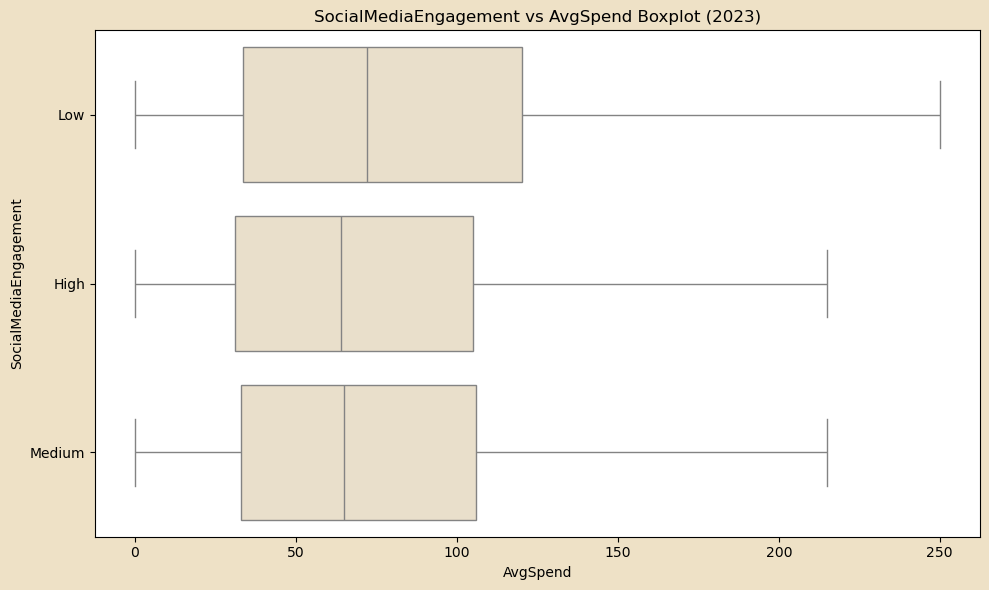

In [41]:
# plotting out the box plot
plot_box_plot(filtered_df_two_23, 'AvgSpend', 'SocialMediaEngagement',
                "SocialMediaEngagement vs AvgSpend Boxplot (2023)", 'spend_vs_engagement_boxplot_2023.png')

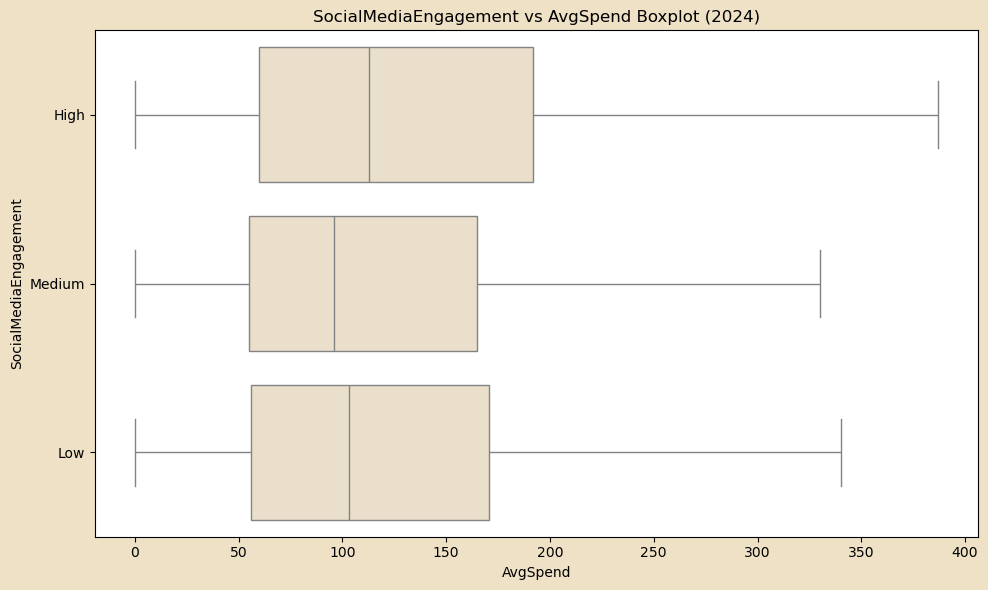

In [42]:
# plotting out the box plot
plot_box_plot(filtered_df_two_24, 'AvgSpend', 'SocialMediaEngagement',
                "SocialMediaEngagement vs AvgSpend Boxplot (2024)", 'spend_vs_engagement_boxplot_2024.png')

<h2 style="color: #8b5e3c"> AvgSpend vs BasketballPropensity (Scatter Plot) </h2>
Next, we would like to compare the AvgSpend against the BasketballPropensity. The AvgSpend is a numerical feature and so is the BasketballPropensity. We attempt to make a scatter plot in hopes that we can try to derive a relationship between these two features.

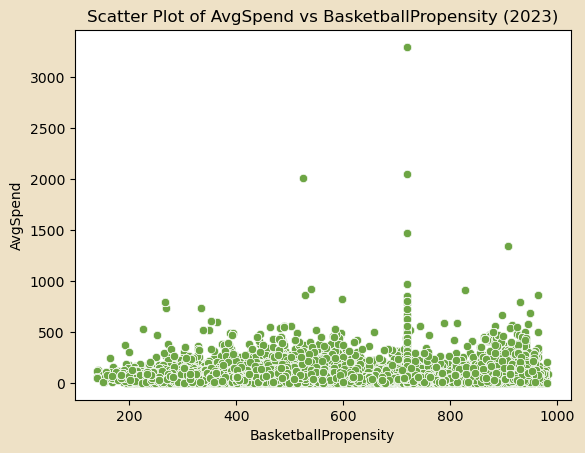

In [44]:
sns.scatterplot(data=filtered_df_two_23, x='BasketballPropensity', y='AvgSpend', color='#6DA544')
sns.set_style( {'figure.facecolor': '#EEE1C6'})
plt.title("Scatter Plot of AvgSpend vs BasketballPropensity (2023)")
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_2023.png", dpi=300, bbox_inches='tight')

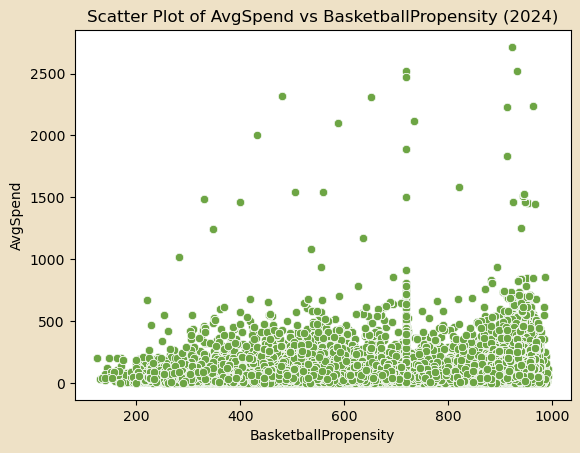

In [45]:
sns.scatterplot(data=filtered_df_two_24, x='BasketballPropensity', y='AvgSpend', color='#6DA544')
sns.set_style( {'figure.facecolor': '#EEE1C6'})
plt.title("Scatter Plot of AvgSpend vs BasketballPropensity (2024)")
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_2024.png", dpi=300, bbox_inches='tight')

<h3 style="color: #8b5e3c"> AvgSpend vs BasketballPropensity (Box Plot) </h3>
Looking at the scatter plot, it is difficult to derive any relationships. In some of our previous approaches, we have categorized BasketballPropensity, and we would like to compare a categorical variable against the numerical variable.

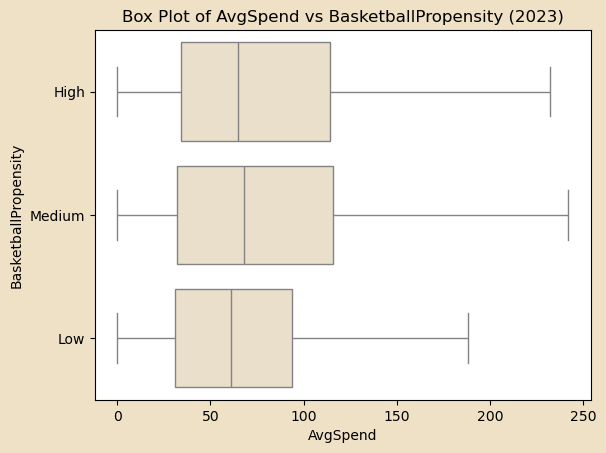

In [47]:
# plotting out a box plot
sns.boxplot(filtered_df_2023, x='AvgSpend', y='BasketballPropensity', showfliers=False, color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# plotting a title and saving the figure
plt.title("Box Plot of AvgSpend vs BasketballPropensity (2023)")
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_box_plot_2023.png", dpi=300, bbox_inches='tight')

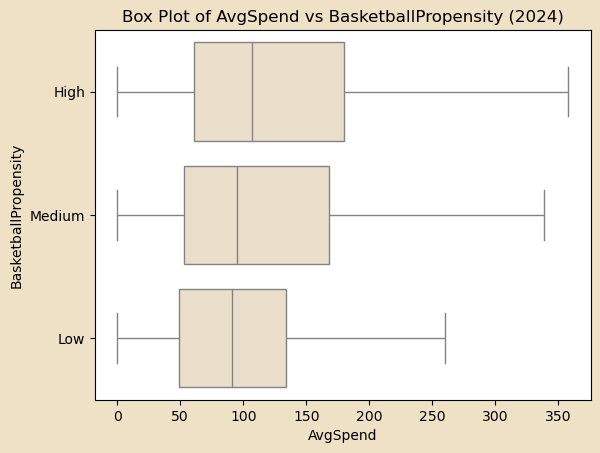

In [48]:
# plotting out a box plot
sns.boxplot(filtered_df_2024, x='AvgSpend', y='BasketballPropensity', showfliers=False, color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# plotting a title and saving the figure
plt.title("Box Plot of AvgSpend vs BasketballPropensity (2024)")
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_box_plot_2024.png", dpi=300, bbox_inches='tight')

<h3 style="color: #8b5e3c"> AvgSpend Kernel Density Estimation Plot </h3>
Before we move on to categorizing the AvgSpend feature, we would like to see the distribution of the AvgSpend numerical feature. We want to see if this can help us determine the limits for each category of the average spending.

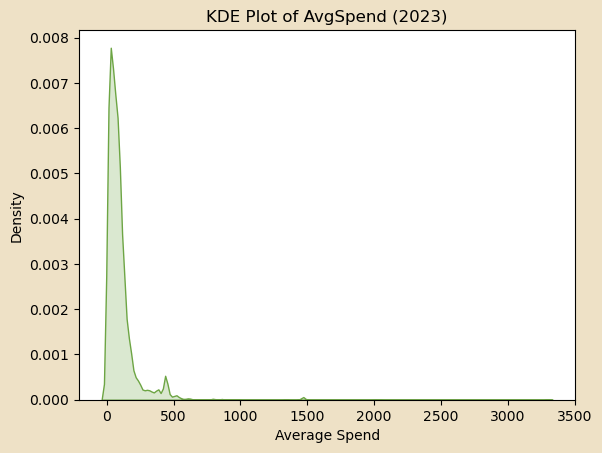

In [50]:
# code to plot out out  kernel density estimation plot
sns.kdeplot(data=account_df_copy_2023, x='AvgSpend', fill=True, color='#6DA544')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# adding in the plotting details
plt.title("KDE Plot of AvgSpend (2023)")
plt.xlabel("Average Spend")
plt.ylabel("Density")

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_kde_2023.png", dpi=300, 
            bbox_inches='tight')

# displaying the plot
plt.show()

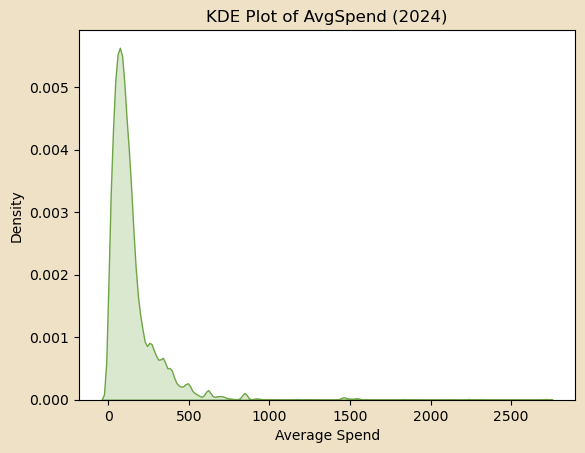

In [51]:
# code to plot out out  kernel density estimation plot
sns.kdeplot(data=account_df_copy_2024, x='AvgSpend', fill=True, color='#6DA544')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# adding in the plotting details
plt.title("KDE Plot of AvgSpend (2024)")
plt.xlabel("Average Spend")
plt.ylabel("Density")

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_kde_2024.png", dpi=300, 
            bbox_inches='tight')

# displaying the plot
plt.show()

<h3 style="color: #8b5e3c"> AvgSpend vs BasketballPropensity (Heat Map) </h3>
Next, we would like to plot a heat map. Given that we have categorized BasketballPropensity, we would also like to categorize AvgSpend. We would like to categorize the lower spenders as 0 to 500, medium spenders as 500 to 1500 and high spenders as 1500 to 3000.

In [53]:
# creating a new copy of the data frame
account_df_copy_two_2023 = account_df_copy_2023.copy()

# categorizing the AvgSpend so that it becomes a categorical variable
for average_spend in account_df_copy_two_2023.index:
    spending_value = account_df_copy_two_2023.at[average_spend, 'AvgSpend']
    if(0 <= spending_value < 300):
        account_df_copy_two_2023.at[average_spend, 'AvgSpend'] = 'Low'
    if(300 <= spending_value < 1500):
        account_df_copy_two_2023.at[average_spend, 'AvgSpend'] = 'Medium'
    if(1500 <= spending_value):
        account_df_copy_two_2023.at[average_spend, 'AvgSpend'] = 'High'

# displaying the data frame
account_df_copy_two_2023.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\605894622.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Medium' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  account_df_copy_two_2023.at[average_spend, 'AvgSpend'] = 'Medium'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,Medium,0,F,Midwest,High,Low,1,Midwest 800 to 1000
1,1,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,Medium,0,F,Midwest,High,Low,1,Midwest 800 to 1000
2,2,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,Medium,0,F,Midwest,High,Low,1,Midwest 800 to 1000


In [54]:
# creating a new copy of the data frame
account_df_copy_two_2024 = account_df_copy_2024.copy()

# categorizing the AvgSpend so that it becomes a categorical variable
for average_spend in account_df_copy_two_2024.index:
    spending_value = account_df_copy_two_2024.at[average_spend, 'AvgSpend']
    if(0 <= spending_value < 300):
        account_df_copy_two_2024.at[average_spend, 'AvgSpend'] = 'Low'
    if(300 <= spending_value < 1500):
        account_df_copy_two_2024.at[average_spend, 'AvgSpend'] = 'Medium'
    if(1500 <= spending_value < 3000):
        account_df_copy_two_2024.at[average_spend, 'AvgSpend'] = 'High'

# displaying the data frame
account_df_copy_two_2024.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\1857452982.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  account_df_copy_two_2024.at[average_spend, 'AvgSpend'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,Low,0,A,Midwest,High,High,0,Midwest 800 to 1000
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,Low,0,A,Midwest,High,High,0,Midwest 800 to 1000
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,...,2,0,Low,0,B,Milwaukee,Medium,Medium,0,Milwaukee County 400 to 800


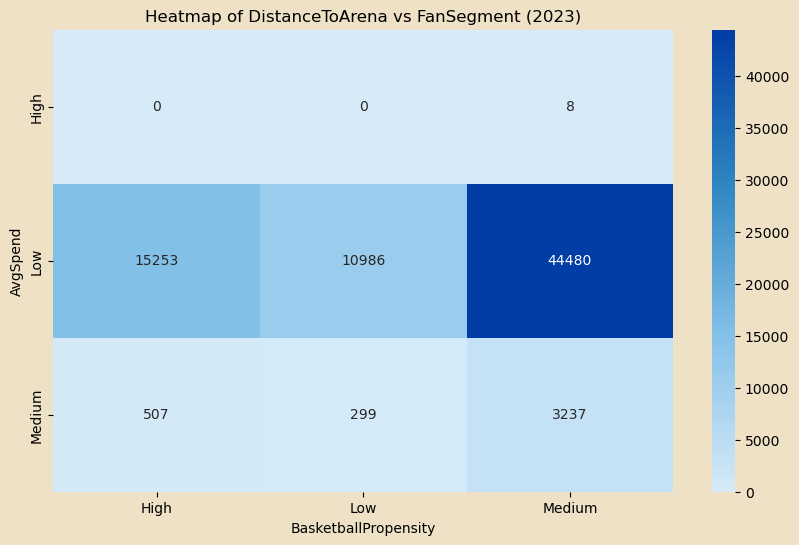

In [55]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2023['AvgSpend'], account_df_copy_two_2023['BasketballPropensity'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs FanSegment (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

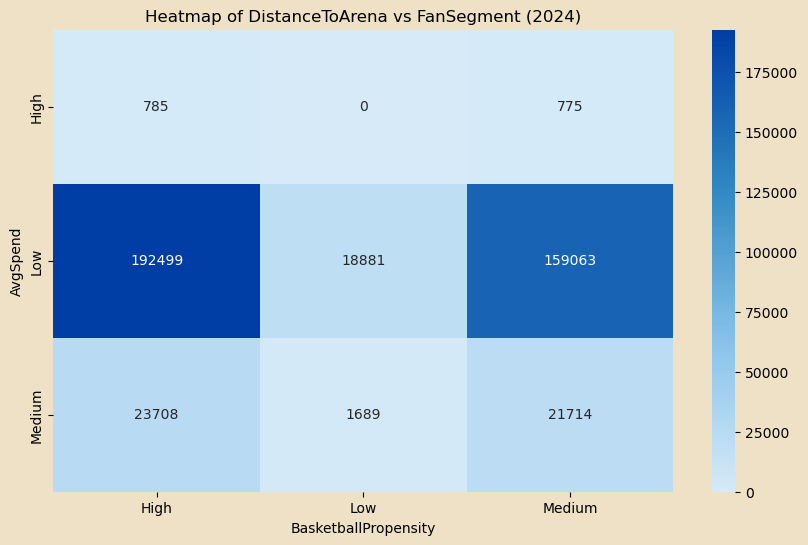

In [56]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2024['AvgSpend'], account_df_copy_two_2024['BasketballPropensity'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs FanSegment (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> AvgSpend vs DistanceToArena (Scatter Plot) </h2>
We now move on to comparing AvgSpend, which is a numerical feature, and DistanceToArena, which is also a numerical feature. Since we're comparing two numerical features, this means that we can use a jointplot to help us to identify the relationships between these features.

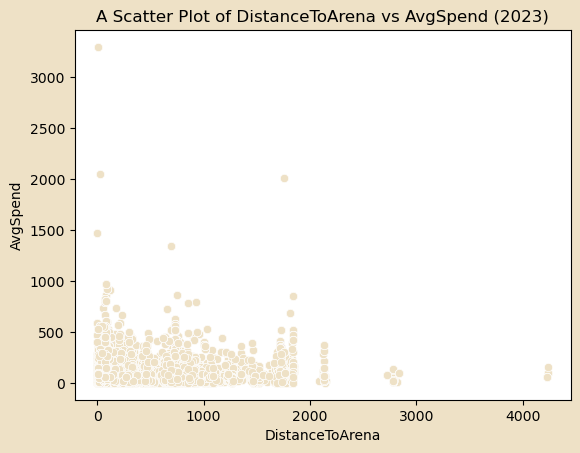

In [58]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2023, x='DistanceToArena', y='AvgSpend', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_scatter_plot_2023.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of DistanceToArena vs AvgSpend (2023)")
plt.show()

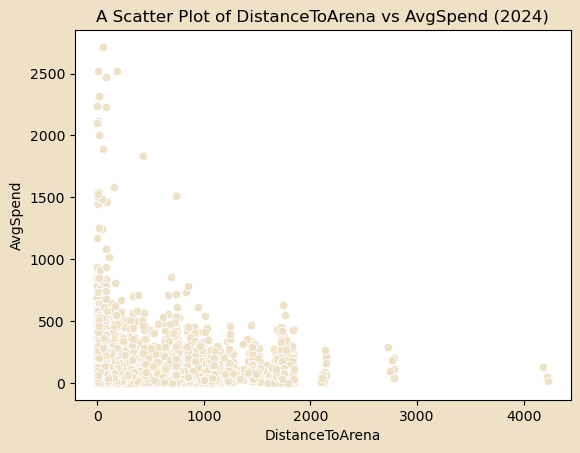

In [59]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2024, x='DistanceToArena', y='AvgSpend', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_scatter_plot_2024.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of DistanceToArena vs AvgSpend (2024)")
plt.show()

<h3 style="color: #8b5e3c"> AvgSpend vs DistanceToArena (Heat Map) </h3>
Looking at the scatter plot, we're able to see that as the distance to arena increases, the average spending decreases. We're curious to see how this plays out as a heat map. Using a data frame where we previously categorized both of these features, we draw out a heat map.

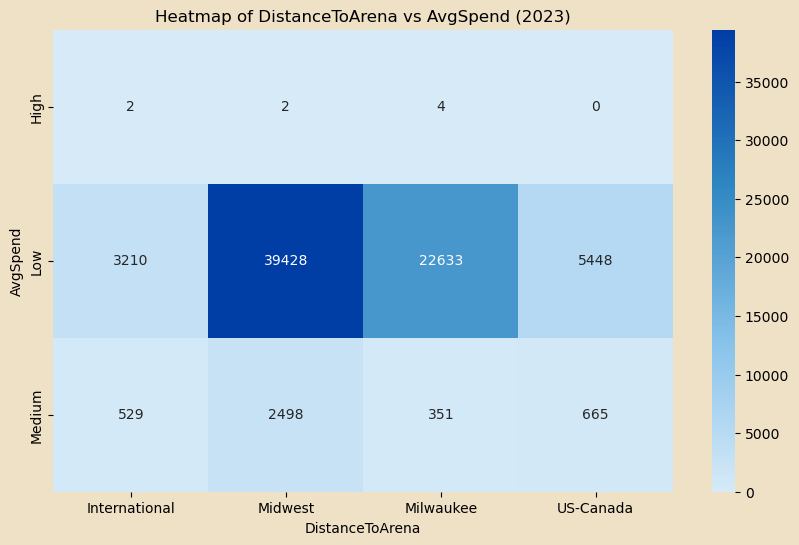

In [61]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2023['AvgSpend'], account_df_copy_two_2023['DistanceToArena'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs AvgSpend (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

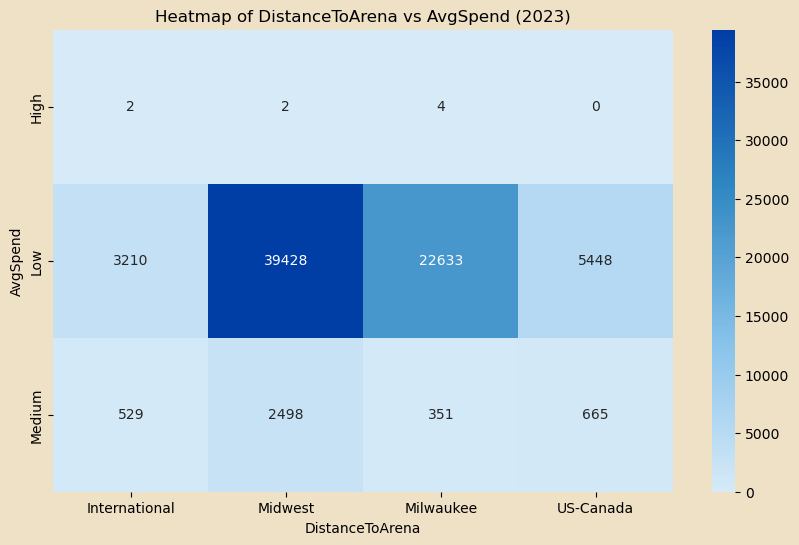

In [62]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2023['AvgSpend'], account_df_copy_two_2023['DistanceToArena'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs AvgSpend (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> GamesAttended vs BasketballPropensity (Scatter Plot) </h2>
Now, we'd like to compare the number of games attended by the fans against the level of interest in basketball. Since they're both numerical features, we would create a scatter plot to be able to derive any relationships.

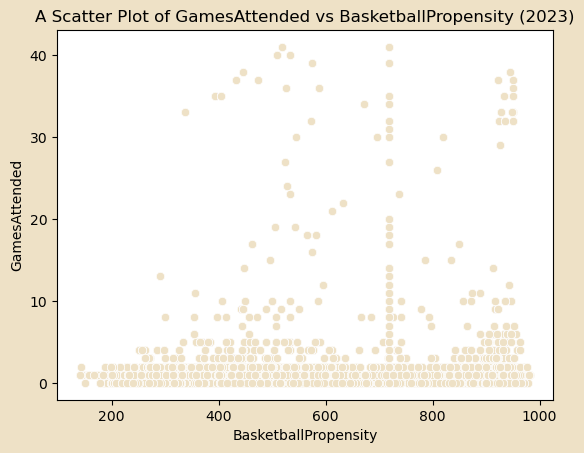

In [64]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2023, x='BasketballPropensity', y='GamesAttended', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_attended_scatter_plot_2023.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of GamesAttended vs BasketballPropensity (2023)")
plt.show()

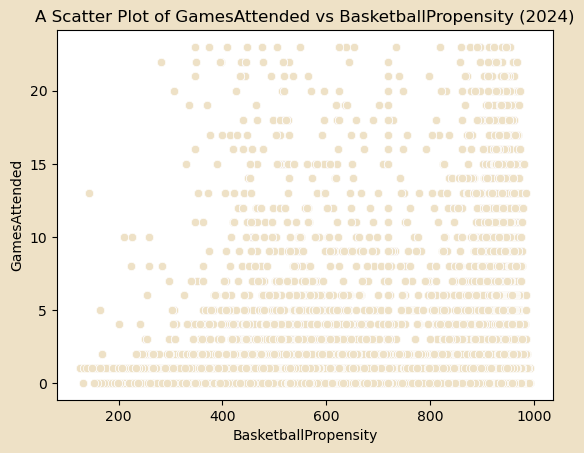

In [65]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2024, x='BasketballPropensity', y='GamesAttended', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_attended_scatter_plot_2024.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of GamesAttended vs BasketballPropensity (2024)")
plt.show()

<h3 style="color: #8b5e3c"> GamesAttended vs BasketballPropensity (Box Plot) </h3>
The scatter plot we generated isn't so helpful here. In previous attempts, we'd like to compare BasketballPropensity as a categorical feature against GamesAttended as a numerical feature. We would like to see if there are any relationships we could derive from here.

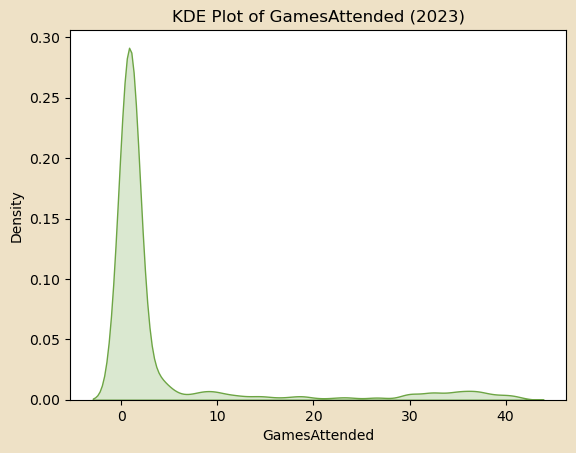

In [67]:
# code to plot out out  kernel density estimation plot
sns.kdeplot(data=account_df_copy_2023, x='GamesAttended', fill=True, color='#6DA544')

# adding in the plotting details
plt.title("KDE Plot of GamesAttended (2023)")
plt.xlabel("GamesAttended")
plt.ylabel("Density")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_kde_plot_2023.png", dpi=300, 
            bbox_inches='tight')


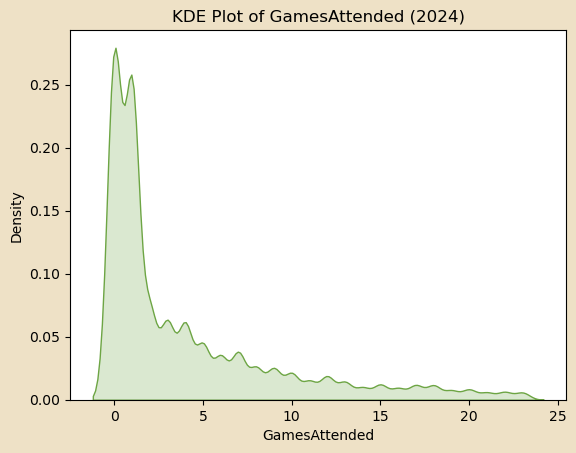

In [68]:
# code to plot out out  kernel density estimation plot
sns.kdeplot(data=account_df_copy_2024, x='GamesAttended', fill=True, color='#6DA544')

# adding in the plotting details
plt.title("KDE Plot of GamesAttended (2024)")
plt.xlabel("GamesAttended")
plt.ylabel("Density")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_kde_plot_2024.png", dpi=300, 
            bbox_inches='tight')

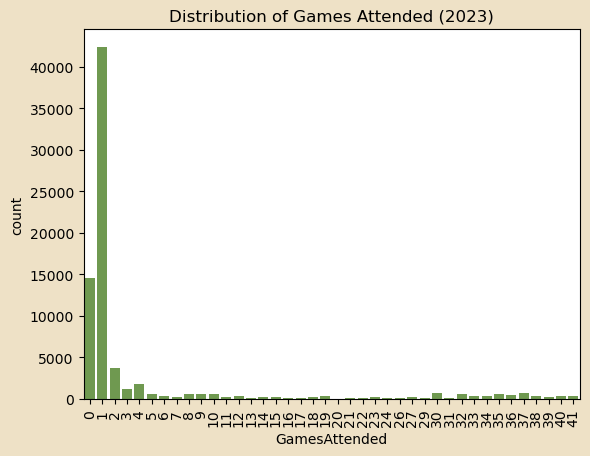

In [69]:
# creating a count plot for games being attended
sns.countplot(data=account_df_copy_2023, x='GamesAttended', color='#6DA544')

# putting in the plot details
plt.xticks(rotation=90)
plt.title("Distribution of Games Attended (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the plot
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_count_plot_2023.png", dpi=300, 
            bbox_inches='tight')
plt.show()

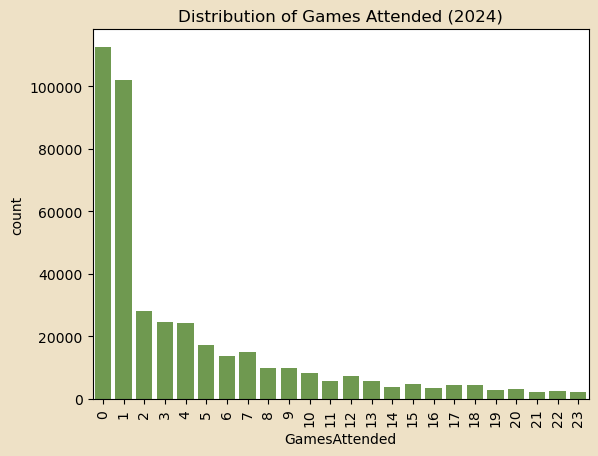

In [70]:
# creating a count plot for games being attended
sns.countplot(data=account_df_copy_2024, x='GamesAttended', color='#6DA544')

# putting in the plot details
plt.xticks(rotation=90)
plt.title("Distribution of Games Attended (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the plot
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_count_plot_2024.png", dpi=300, 
            bbox_inches='tight')
plt.show()

<h3 style="color: #8b5e3c"> GamesAttended vs BasketballPropensity (HeatMap) </h3>
Lastly, we would like to attempt to create a heat map by converting the numerical feature of GamesAttended into a cattegorical feature. Since we're comparing a categorical feature against another categorical feature, this means we can plot out a heat map.

In [72]:
# creating a new copy of the data frame
account_df_copy_three_2023 = account_df_copy_2023.copy()
account_df_copy_three_2024 = account_df_copy_2024.copy()

# categorizing the AvgSpend so that it becomes a categorical variable
for number_of_games in account_df_copy_three_2023.index:
    games = account_df_copy_three_2023.at[number_of_games, 'GamesAttended']
    if(0 <= games < 3):
        account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'Low'
    if(3 <= games < 8):
        account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'Medium'
    if(games >= 8):
        account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'High'

# displaying the data frame
account_df_copy_three_2023.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\3122235814.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,Midwest,High,Low,1,Midwest 800 to 1000
1,1,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,Midwest,High,Low,1,Midwest 800 to 1000
2,2,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,Midwest,High,Low,1,Midwest 800 to 1000


In [73]:
# categorizing the AvgSpend so that it becomes a categorical variable
for number_of_games in account_df_copy_three_2024.index:
    games = account_df_copy_three_2024.at[number_of_games, 'GamesAttended']
    if(0 <= games < 3):
        account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'Low'
    if(3 <= games < 8):
        account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'Medium'
    if(games >= 8):
        account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'High'

# displaying the data frame
account_df_copy_three_2024.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\1664728406.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,Low,A,Midwest,High,High,0,Midwest 800 to 1000
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,Low,A,Midwest,High,High,0,Midwest 800 to 1000
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,...,2,0,4.32,Low,B,Milwaukee,Medium,Medium,0,Milwaukee County 400 to 800


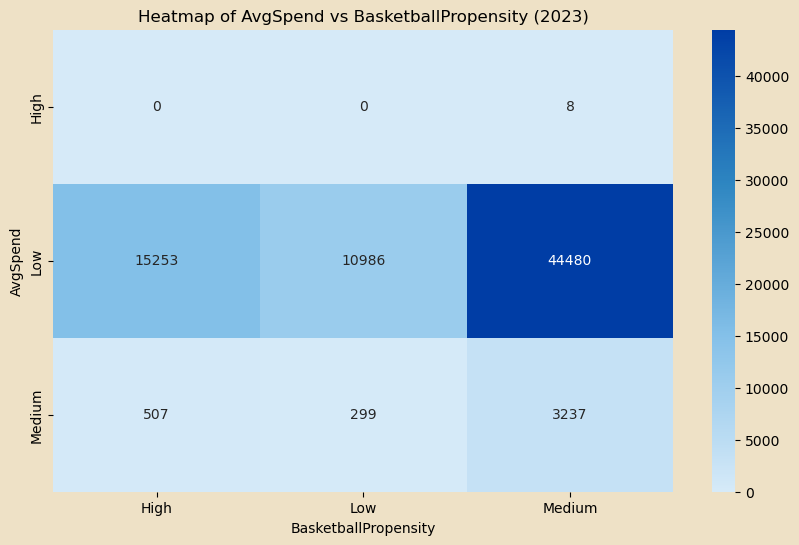

In [74]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2023['AvgSpend'], account_df_copy_two_2023['BasketballPropensity'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of AvgSpend vs BasketballPropensity (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

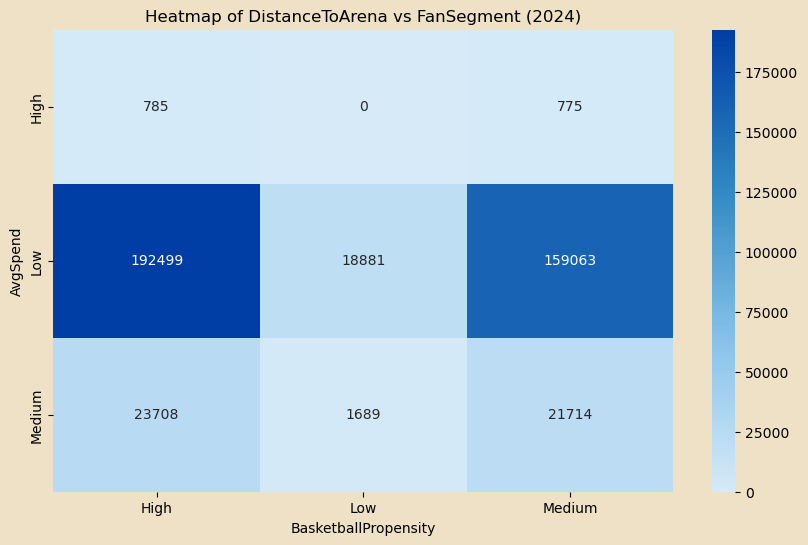

In [75]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2024['AvgSpend'], account_df_copy_two_2024['BasketballPropensity'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs FanSegment (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_propensity_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> AvgSpend vs DistanceToArena (Scatter Plot) </h2>
We now move on to comparing AvgSpend, which is a numerical feature, and DistanceToArena, which is also a numerical feature. Since we're comparing two numerical features, this means that we can use a jointplot to help us to identify the relationships between these features.

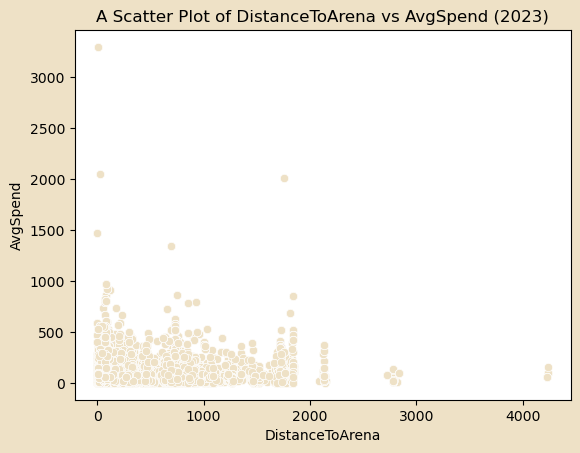

In [77]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2023, x='DistanceToArena', y='AvgSpend', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_scatter_plot_2023.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of DistanceToArena vs AvgSpend (2023)")
plt.show()

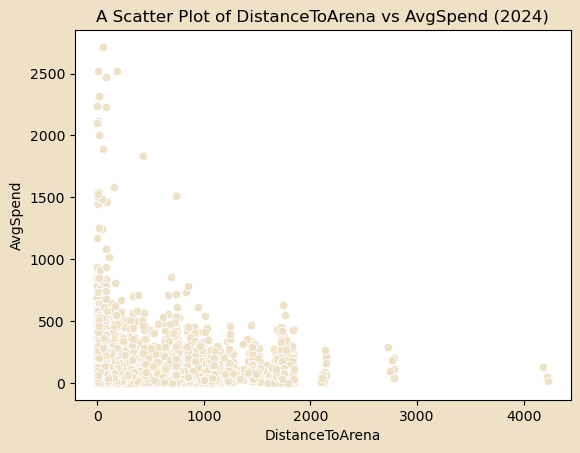

In [78]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2024, x='DistanceToArena', y='AvgSpend', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_scatter_plot_2024.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of DistanceToArena vs AvgSpend (2024)")
plt.show()

<h3 style="color: #8b5e3c"> AvgSpend vs DistanceToArena (Heat Map) </h3>
Looking at the scatter plot, we're able to see that as the distance to arena increases, the average spending decreases. We're curious to see how this plays out as a heat map. Using a data frame where we previously categorized both of these features, we draw out a heat map.

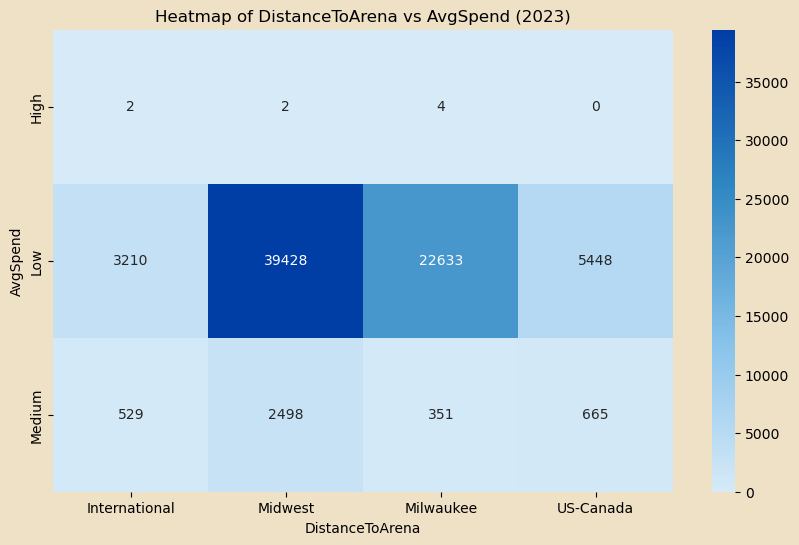

In [80]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2023['AvgSpend'], account_df_copy_two_2023['DistanceToArena'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs AvgSpend (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

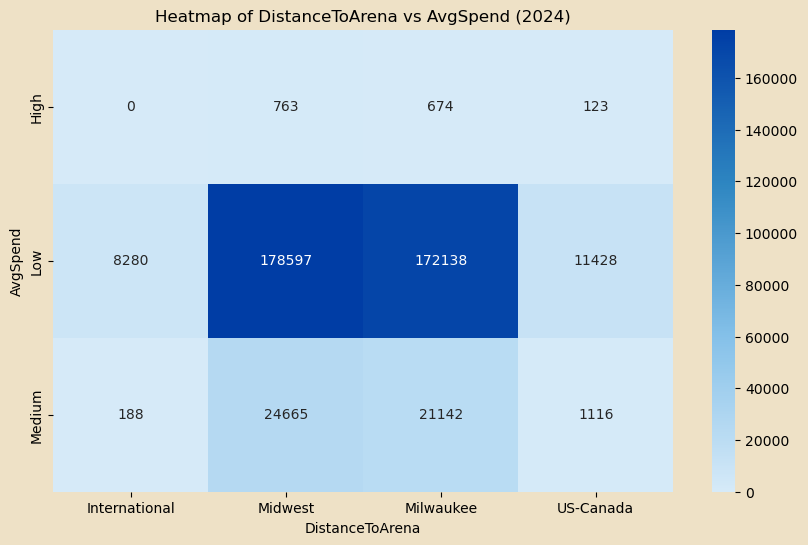

In [81]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_two_2024['AvgSpend'], account_df_copy_two_2024['DistanceToArena'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of DistanceToArena vs AvgSpend (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/spend_vs_distance_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> GamesAttended vs BasketballPropensity (Scatter Plot) </h2>
Now, we'd like to compare the number of games attended by the fans against the level of interest in basketball. Since they're both numerical features, we would create a scatter plot to be able to derive any relationships.

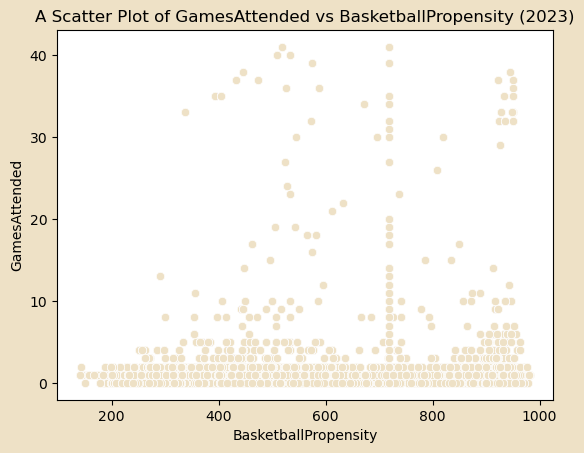

In [83]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2023, x='BasketballPropensity', y='GamesAttended', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_attended_scatter_plot_2023.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of GamesAttended vs BasketballPropensity (2023)")
plt.show()

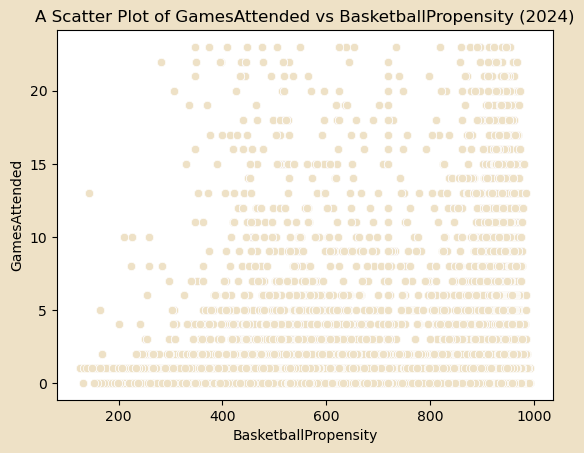

In [84]:
# plotting out a scatter plot
sns.scatterplot(data=account_df_2024, x='BasketballPropensity', y='GamesAttended', color='#EEE1C6')
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_attended_scatter_plot_2024.png", dpi=300, 
            bbox_inches='tight')

# putting in the plot details
plt.title("A Scatter Plot of GamesAttended vs BasketballPropensity (2024)")
plt.show()

<h3 style="color: #8b5e3c"> GamesAttended vs BasketballPropensity (Box Plot) </h3>
The scatter plot we generated isn't so helpful here. In previous attempts, we'd like to compare BasketballPropensity as a categorical feature against GamesAttended as a numerical feature. We would like to see if there are any relationships we could derive from here.

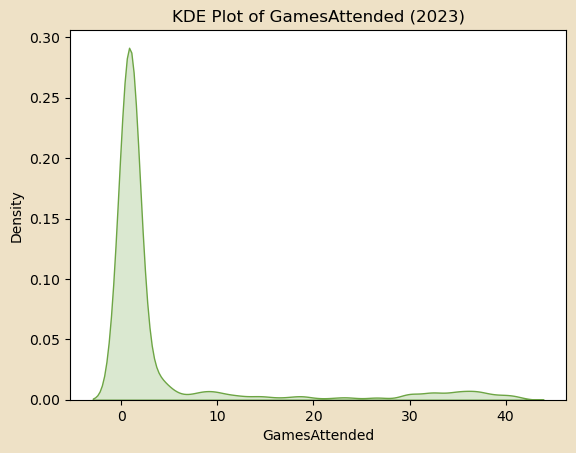

In [86]:
# code to plot out out  kernel density estimation plot
sns.kdeplot(data=account_df_copy_2023, x='GamesAttended', fill=True, color='#6DA544')

# adding in the plotting details
plt.title("KDE Plot of GamesAttended (2023)")
plt.xlabel("GamesAttended")
plt.ylabel("Density")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_kde_plot_2023.png", dpi=300, 
            bbox_inches='tight')


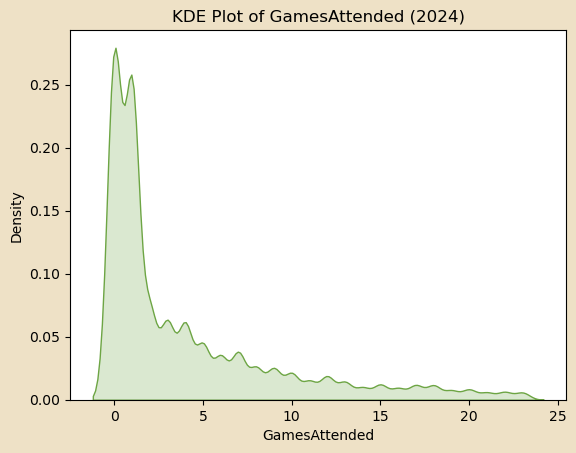

In [87]:
# code to plot out out  kernel density estimation plot
sns.kdeplot(data=account_df_copy_2024, x='GamesAttended', fill=True, color='#6DA544')

# adding in the plotting details
plt.title("KDE Plot of GamesAttended (2024)")
plt.xlabel("GamesAttended")
plt.ylabel("Density")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_kde_plot_2024.png", dpi=300, 
            bbox_inches='tight')


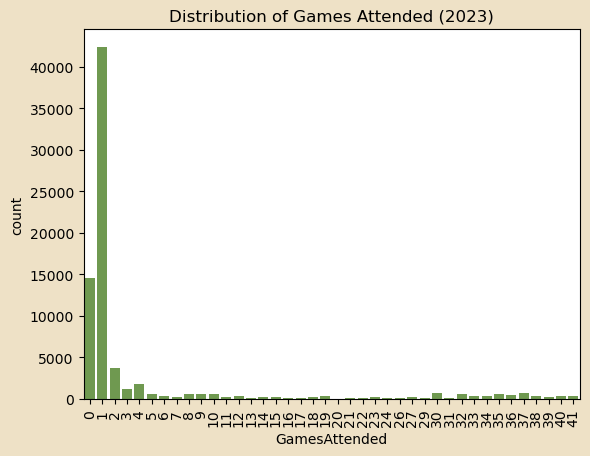

In [88]:
# creating a count plot for games being attended
sns.countplot(data=account_df_copy_2023, x='GamesAttended', color='#6DA544')

# putting in the plot details
plt.xticks(rotation=90)
plt.title("Distribution of Games Attended (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the plot
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_count_plot_2023.png", dpi=300, 
            bbox_inches='tight')
plt.show()

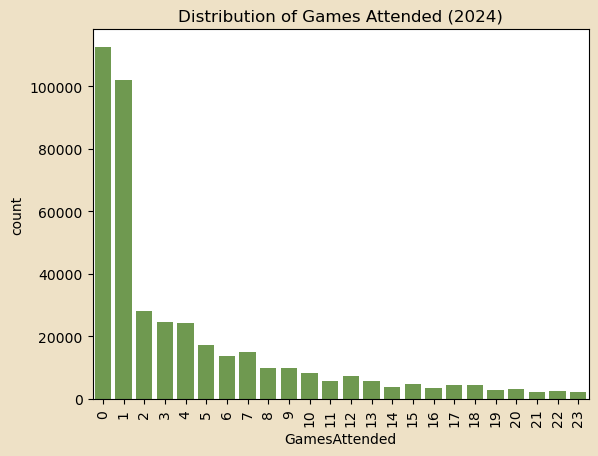

In [89]:
# creating a count plot for games being attended
sns.countplot(data=account_df_copy_2024, x='GamesAttended', color='#6DA544')

# putting in the plot details
plt.xticks(rotation=90)
plt.title("Distribution of Games Attended (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the plot
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_count_plot_2024.png", dpi=300, 
            bbox_inches='tight')
plt.show()

<h3 style="color: #8b5e3c"> GamesAttended vs BasketballPropensity (HeatMap) </h3>
Lastly, we would like to attempt to create a heat map by converting the numerical feature of GamesAttended into a cattegorical feature. Since we're comparing a categorical feature against another categorical feature, this means we can plot out a heat map.

In [91]:
# creating a new copy of the data frame
account_df_copy_three_2023 = account_df_copy_2023.copy()
account_df_copy_three_2024 = account_df_copy_2024.copy()

# categorizing the AvgSpend so that it becomes a categorical variable
for number_of_games in account_df_copy_three_2023.index:
    games = account_df_copy_three_2023.at[number_of_games, 'GamesAttended']
    if(0 <= games < 3):
        account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'Low'
    if(3 <= games < 8):
        account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'Medium'
    if(games >= 8):
        account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'High'

# displaying the data frame
account_df_copy_three_2023.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\3122235814.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  account_df_copy_three_2023.at[number_of_games, 'GamesAttended'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,Midwest,High,Low,1,Midwest 800 to 1000
1,1,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,Midwest,High,Low,1,Midwest 800 to 1000
2,2,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,Midwest,High,Low,1,Midwest 800 to 1000


In [92]:
# categorizing the AvgSpend so that it becomes a categorical variable
for number_of_games in account_df_copy_three_2024.index:
    games = account_df_copy_three_2024.at[number_of_games, 'GamesAttended']
    if(0 <= games < 3):
        account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'Low'
    if(3 <= games < 8):
        account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'Medium'
    if(games >= 8):
        account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'High'

# displaying the data frame
account_df_copy_three_2024.head(3)


C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\2785011659.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  account_df_copy_three_2024.at[number_of_games, 'GamesAttended'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,Low,A,Midwest,High,High,0,Midwest 800 to 1000
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,Low,A,Midwest,High,High,0,Midwest 800 to 1000
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,...,2,0,4.32,Low,B,Milwaukee,Medium,Medium,0,Milwaukee County 400 to 800


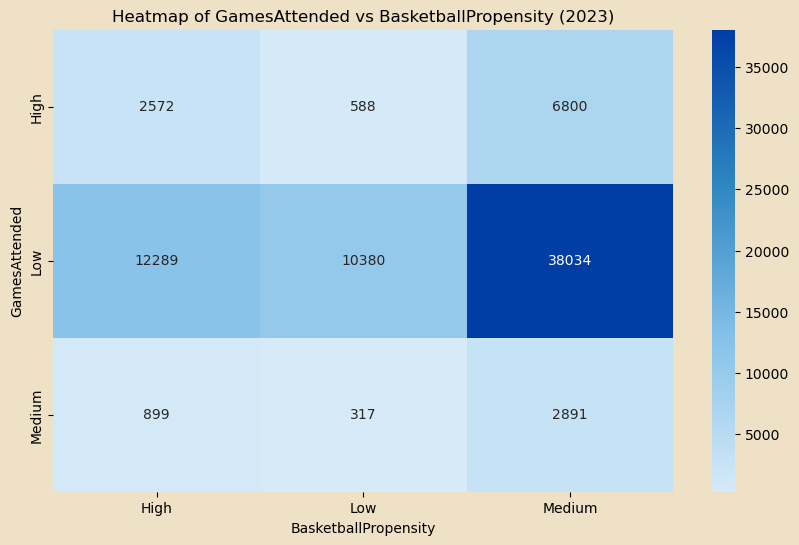

In [93]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_three_2023['GamesAttended'], account_df_copy_three_2023['BasketballPropensity'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_style( {'figure.facecolor': '#EEE1C6'})
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of GamesAttended vs BasketballPropensity (2023)")

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_propensity_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

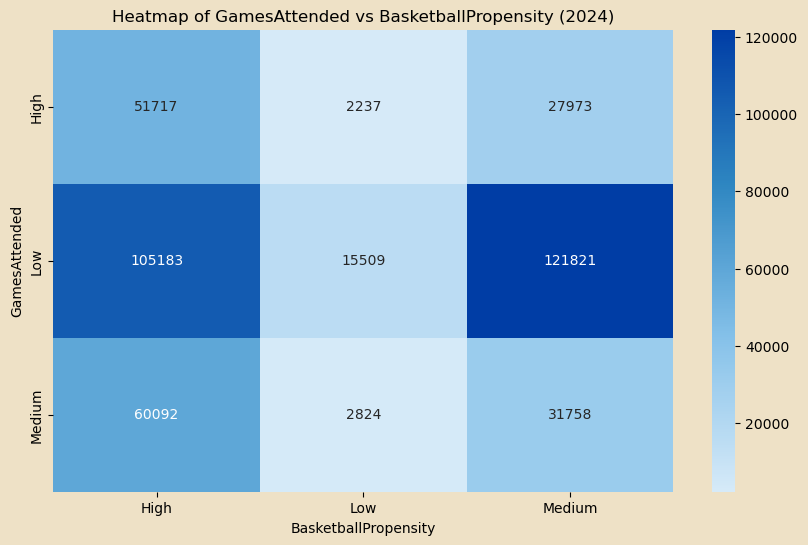

In [94]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_three_2024['GamesAttended'], account_df_copy_three_2024['BasketballPropensity'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.set_style( {'figure.facecolor': '#EEE1C6'})
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of GamesAttended vs BasketballPropensity (2024)")

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_propensity_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> GamesAttended vs FanSegment (Heat Map) </h2>
Given that Fan Segment is a categorical feature, and that GamesAttended is a discrete numerical feature, we've decided to use GamesAttended as a categorical feature like we've done previously, so then we end up plotting a heat map.

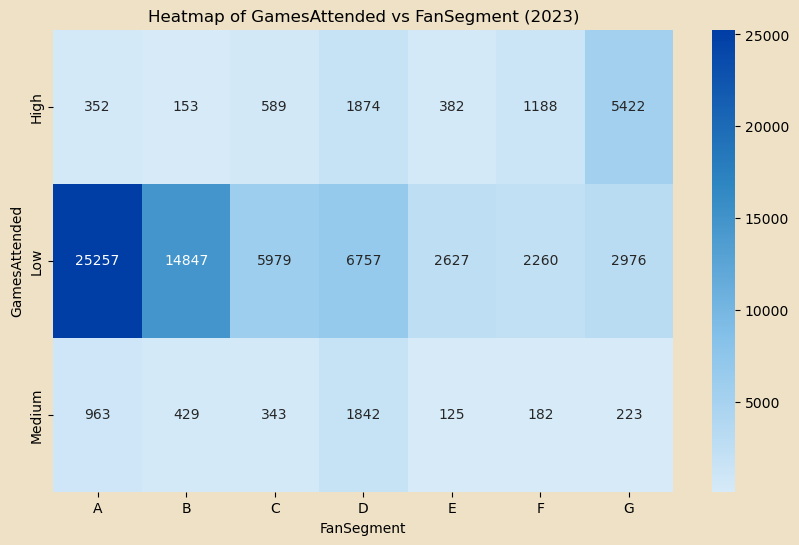

In [96]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_three_2023['GamesAttended'], account_df_copy_three_2023['FanSegment'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of GamesAttended vs FanSegment (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_segment_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

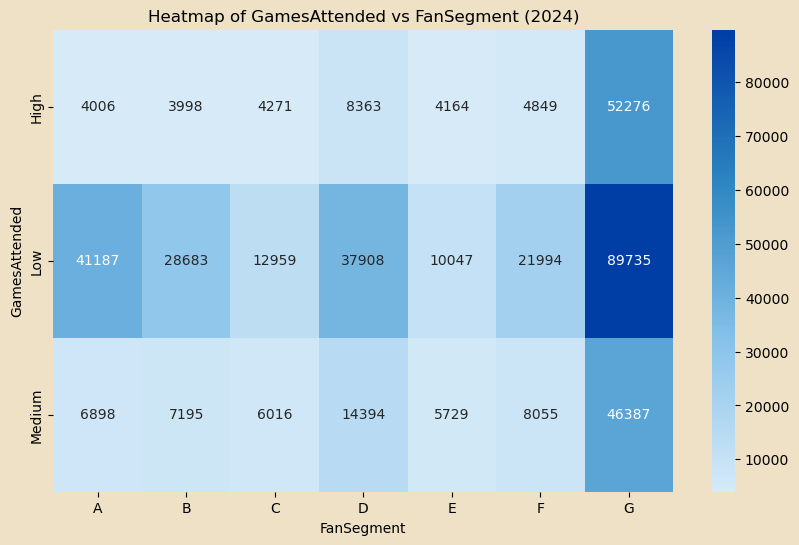

In [97]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_three_2024['GamesAttended'], account_df_copy_three_2024['FanSegment'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of GamesAttended vs FanSegment (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_segment_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> GamesAttended vs DistanceToArena (BoxPlot) </h2>
Now, we move on to comparing GamesAttended against the DistanceToArena feature. We plan to treat the GamesAttended feature as a categorical feature, and the DistanceToArena feature as a numerical feature. As a result, we plan on plotting out box plots that will help us determine the relationships between them.

In [99]:
# creating a new copy of the data frame
account_df_copy_four_2023 = account_df_2023.copy()
account_df_copy_four_2024 = account_df_2024.copy()

# categorizing the AvgSpend so that it becomes a categorical variable
for number_of_games in account_df_copy_four_2023.index:
    games = account_df_copy_four_2023.at[number_of_games, 'GamesAttended']
    if(0 <= games < 3):
        account_df_copy_four_2023.at[number_of_games, 'GamesAttended'] = 'Low'
    if(3 <= games < 8):
        account_df_copy_four_2023.at[number_of_games, 'GamesAttended'] = 'Medium'
    if(games >= 8):
        account_df_copy_four_2023.at[number_of_games, 'GamesAttended'] = 'High'

# displaying the data frame
account_df_copy_four_2023.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\262218822.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  account_df_copy_four_2023.at[number_of_games, 'GamesAttended'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,12.0,872.0,Low,1,Midwest 800 to 1000
1,1,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,12.0,872.0,Low,1,Midwest 800 to 1000
2,2,2023,1,2024-01-24 Cleveland Cavaliers,2024-01-24,D,Bucket Cap,0,2023,0,...,0,0,467.0,Low,F,12.0,872.0,Low,1,Midwest 800 to 1000


In [100]:
# categorizing the AvgSpend so that it becomes a categorical variable
for number_of_games in account_df_copy_four_2024.index:
    games = account_df_copy_four_2024.at[number_of_games, 'GamesAttended']
    if(0 <= games < 3):
        account_df_copy_four_2024.at[number_of_games, 'GamesAttended'] = 'Low'
    if(3 <= games < 8):
        account_df_copy_four_2024.at[number_of_games, 'GamesAttended'] = 'Medium'
    if(games >= 8):
        account_df_copy_four_2024.at[number_of_games, 'GamesAttended'] = 'High'

# displaying the data frame
account_df_copy_four_2024.head(3)

C:\Users\galvanm\AppData\Local\Temp\ipykernel_24388\1763427716.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Low' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  account_df_copy_four_2024.at[number_of_games, 'GamesAttended'] = 'Low'


,Unnamed: 0.1,Season_x,AccountNumber,Game,GameDate,GameTier,Giveaway,Unnamed: 0,Season_y,SingleGameTickets,...,GroupTickets,STM,AvgSpend,GamesAttended,FanSegment,DistanceToArena,BasketballPropensity,SocialMediaEngagement,GiveawayLabel,color_flag
0,0,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,Low,A,47.0,916.0,High,0,Midwest 800 to 1000
1,1,2024,2,2025-02-20 Los Angeles Clippers,2025-02-20,C,NaN,15835,2024,2,...,0,0,95.00,Low,A,47.0,916.0,High,0,Midwest 800 to 1000
2,2,2024,34,2024-11-22 Indiana Pacers,2024-11-22,B,NaN,16274,2024,0,...,2,0,4.32,Low,B,4.0,502.0,Medium,0,Milwaukee County 400 to 800


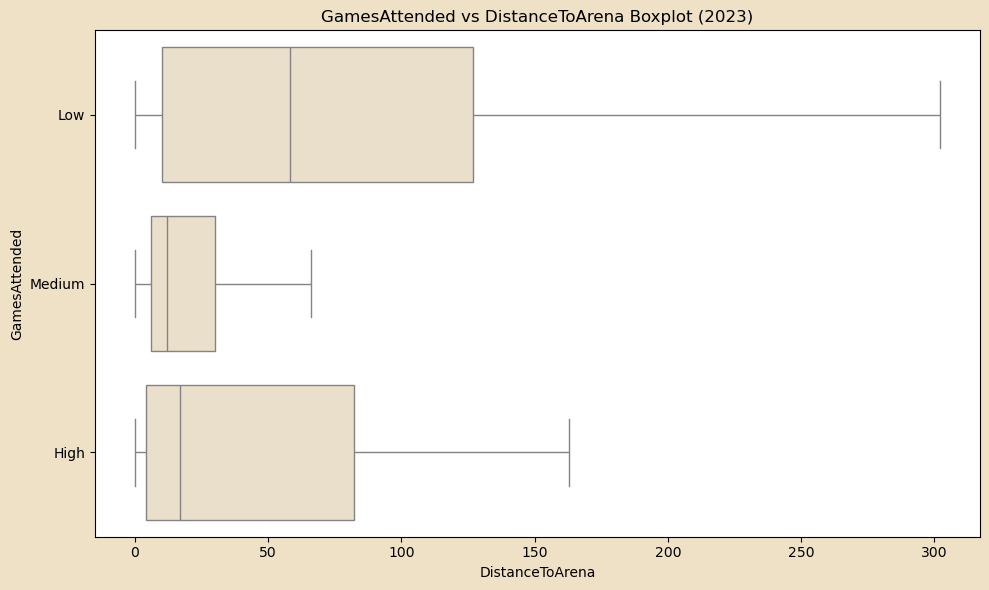

In [101]:
# function for plotting out the box plot
plot_box_plot(account_df_copy_four_2023, "DistanceToArena", "GamesAttended", 
              'GamesAttended vs DistanceToArena Boxplot (2023)', 'attended_vs_distance_boxplot_2023')

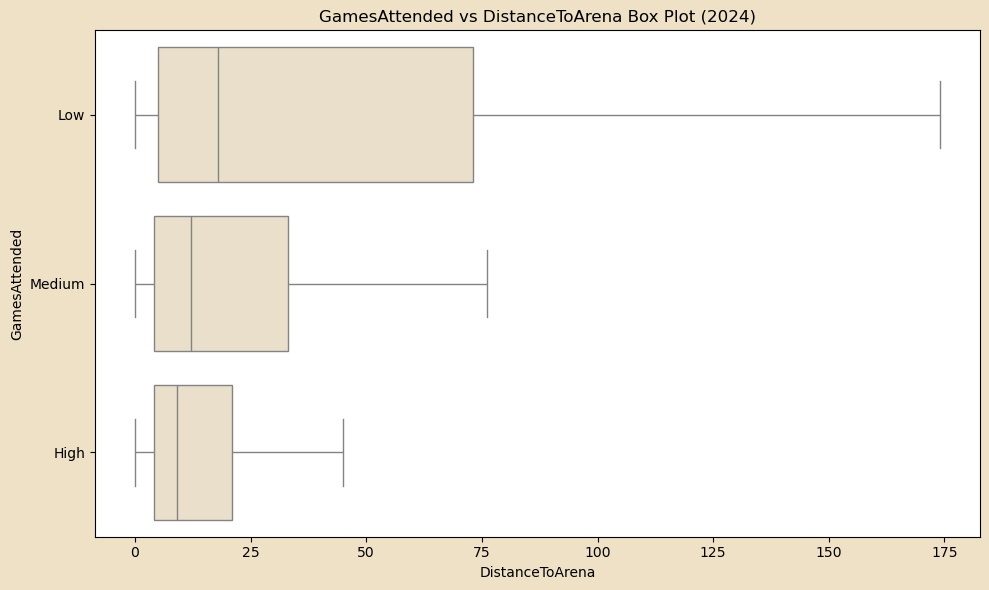

In [102]:
# function for plotting out the box plot
plot_box_plot(account_df_copy_four_2024, "DistanceToArena", "GamesAttended", 
              'GamesAttended vs DistanceToArena Box Plot (2024)', 'attended_vs_distance_boxplot_2024')

<h2 style="color: #8b5e3c"> GamesAttended vs SocialMediaEngagement (Heat Map) </h2>
Next, we compare GamesAttended, which is a categorical feature for us, against SocialMediaEngagement, which is also another categorical feature. As a result, we would like to plot a heat map to compare the features.

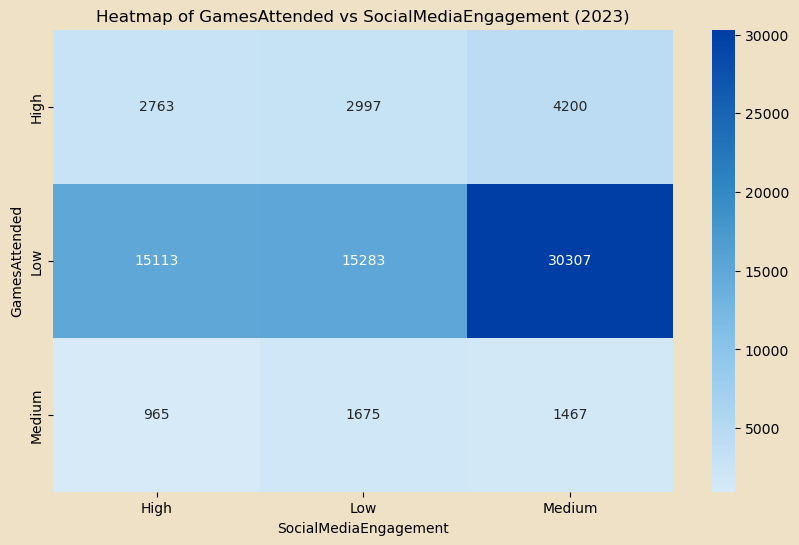

In [104]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_three_2023['GamesAttended'], account_df_copy_three_2023['SocialMediaEngagement'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of GamesAttended vs SocialMediaEngagement (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_engagement_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

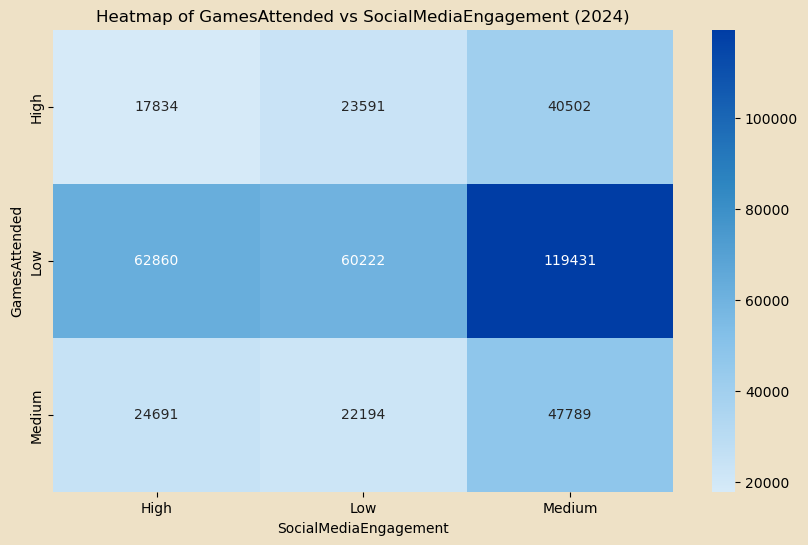

In [105]:
# producing a frequency table
heatmap = pd.crosstab(account_df_copy_three_2024['GamesAttended'], account_df_copy_three_2024['SocialMediaEngagement'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of GamesAttended vs SocialMediaEngagement (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/attended_vs_engagement_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> STM vs DistanceToArena (Box Plot) </h2>
Now, we move to plot the STM against the DistanceToArena. Since the STM is a discrete feature of just 0 and 1, we know that it is categorical. We also know that the DistanceToArena feature is numerical, so we decide to plot out a violin plot.

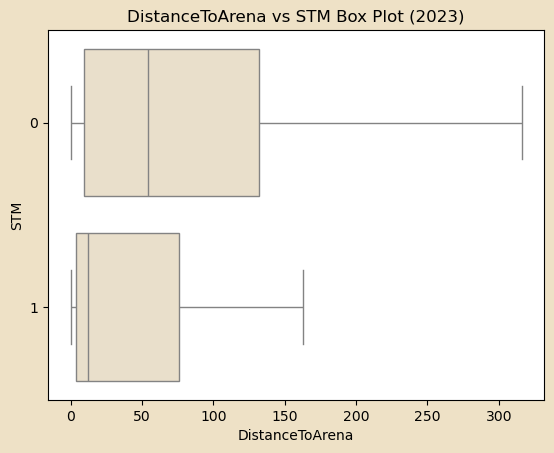

In [107]:
account_df_2023['STM'] = account_df_2023['STM'].astype('category')
sns.boxplot(data=account_df_2023, x="DistanceToArena", y="STM", showfliers=False, color="#EEE1C6")
plt.title("DistanceToArena vs STM Box Plot (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/distance_vs_stm_boxplot_2023.png", dpi=300, 
            bbox_inches='tight')

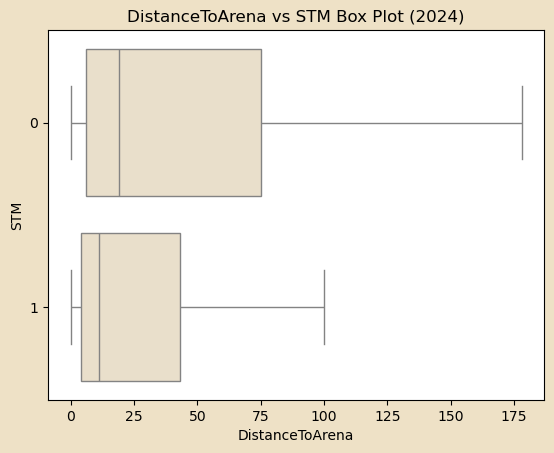

In [108]:
account_df_2024['STM'] = account_df_2024['STM'].astype('category')
sns.boxplot(data=account_df_2024, x="DistanceToArena", y="STM", showfliers=False, color="#EEE1C6")
plt.title("DistanceToArena vs STM Box Plot (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/distance_vs_stm_boxplot_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> STM vs BasketballPropensity (Box Plot) </h2>
Next, we move on to plotting the STM feature against the BasketballPropensity feature. Since we're treating the STM feature as cateogrical, we can then plot out a box plot to derive a relationship.

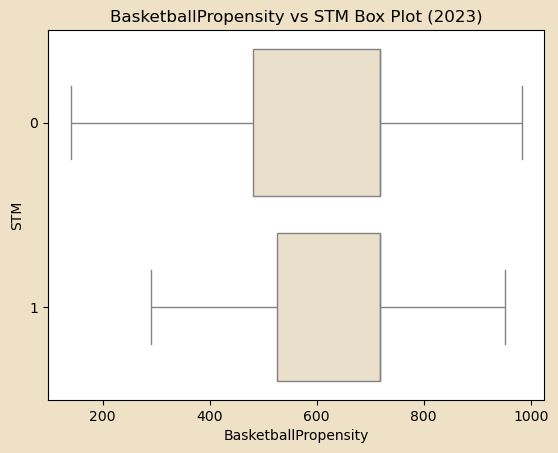

In [110]:
sns.boxplot(data=account_df_2023, x="BasketballPropensity", y="STM", showfliers=False, color="#EEE1C6")
plt.title("BasketballPropensity vs STM Box Plot (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_stm_boxplot_2023.png", dpi=300, 
            bbox_inches='tight')

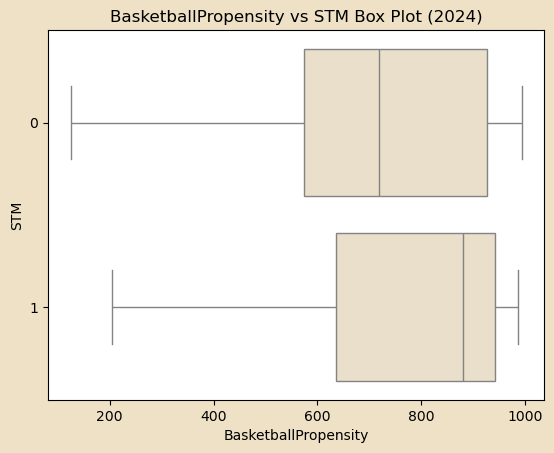

In [111]:
sns.boxplot(data=account_df_2024, x="BasketballPropensity", y="STM", showfliers=False, color="#EEE1C6")
plt.title("BasketballPropensity vs STM Box Plot (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/propensity_vs_stm_boxplot_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> STM vs FanSegment (Heat Map) </h2>
Next, we move on to plotting the STM, which is a categorical feature, against the Fan Segment. Since we're comparing two categorical features against one another, we decide that we should go with a heat map.

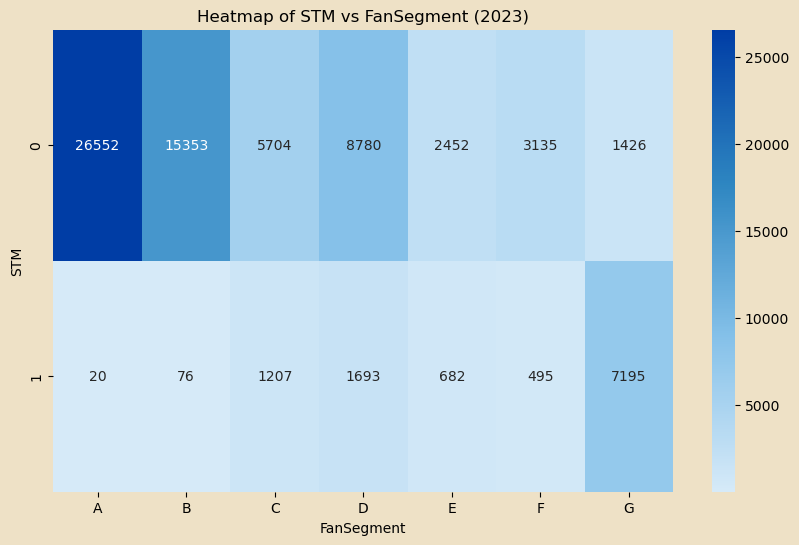

In [113]:
# producing a frequency table
heatmap = pd.crosstab(filtered_df_2023['STM'], filtered_df_2023['FanSegment'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of STM vs FanSegment (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_fan_segment_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

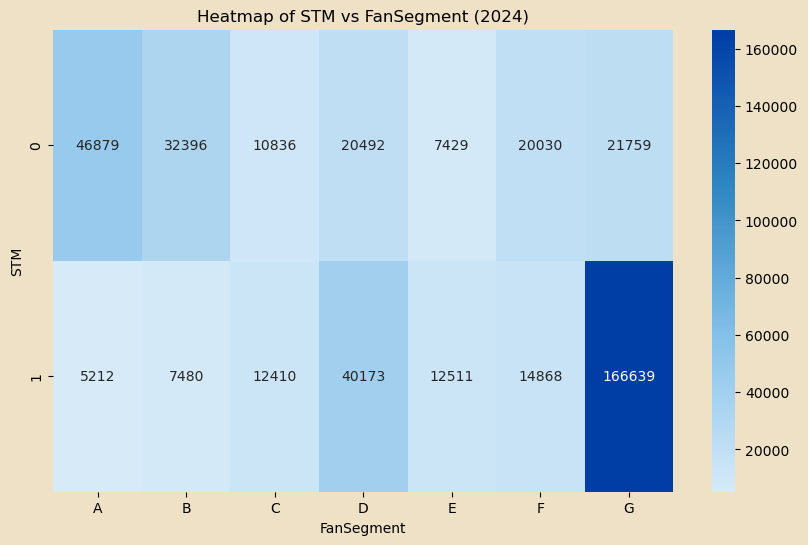

In [114]:
# producing a frequency table
heatmap = pd.crosstab(filtered_df_2024['STM'], filtered_df_2024['FanSegment'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of STM vs FanSegment (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_fan_segment_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> STM vs GamesAttended (Box Plot) </h2>
Next, we move on to plotting the STM against GamesAttended. Since the STM is a categorical feature and GamesAttended is a numerical feature, we have decided to plot a box plot.

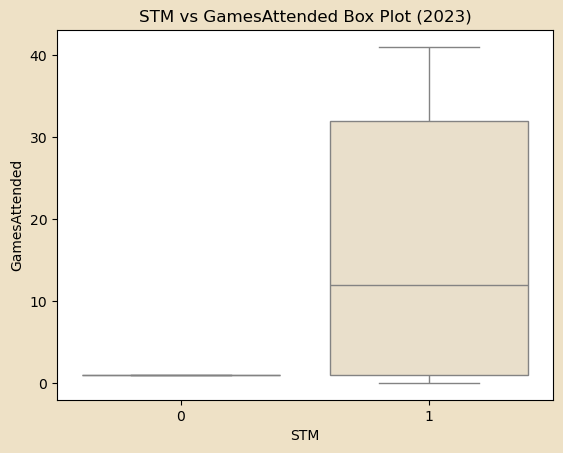

In [116]:
sns.boxplot(data=account_df_2023, x="STM", y="GamesAttended", showfliers=False, color="#EEE1C6")
plt.title("STM vs GamesAttended Box Plot (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_gamesattended_boxplot_2023.png", dpi=300, 
            bbox_inches='tight')

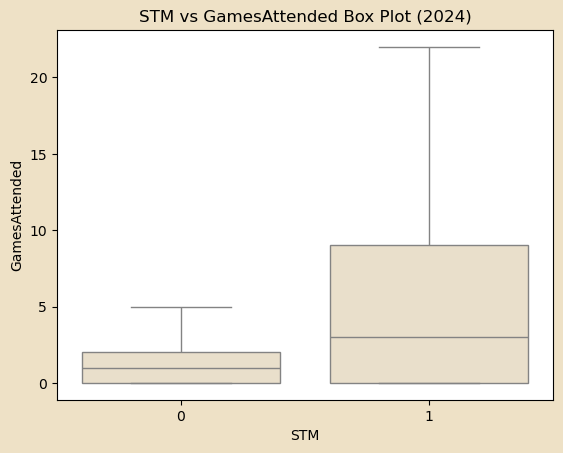

In [117]:
sns.boxplot(data=account_df_2024, x="STM", y="GamesAttended", showfliers=False, color="#EEE1C6")
plt.title("STM vs GamesAttended Box Plot (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

# saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_gamesattended_boxplot_2024.png", dpi=300, 
            bbox_inches='tight')

<h2 style="color: #8b5e3c"> STM vs SocialMediaEngagement (Heat Map) </h2>
Next, we move on to plotting the STM, which is a categorical feature, against SocialMediaEngagement, which is a categorical feature. As a result, we plan to plot out a heat map.

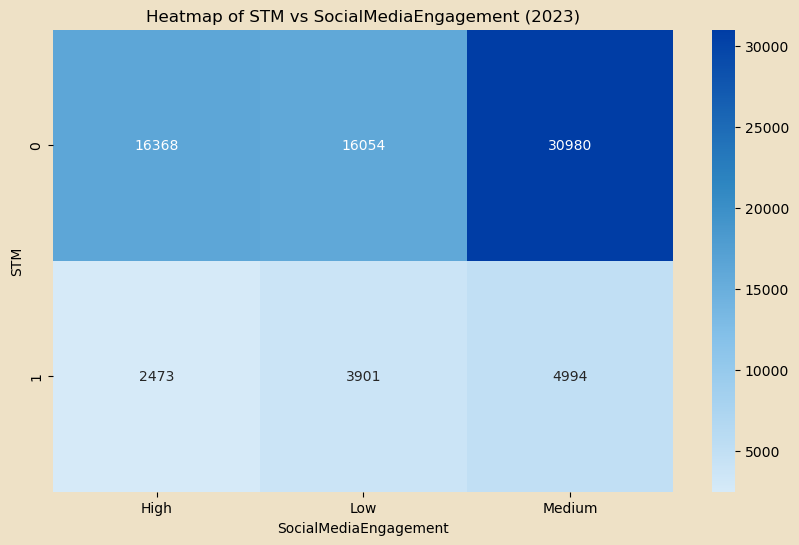

In [119]:
# producing a frequency table
heatmap = pd.crosstab(filtered_df_2023['STM'], filtered_df_2023['SocialMediaEngagement'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of STM vs SocialMediaEngagement (2023)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_engagement_heatmap_2023.png", dpi=300, 
            bbox_inches='tight')

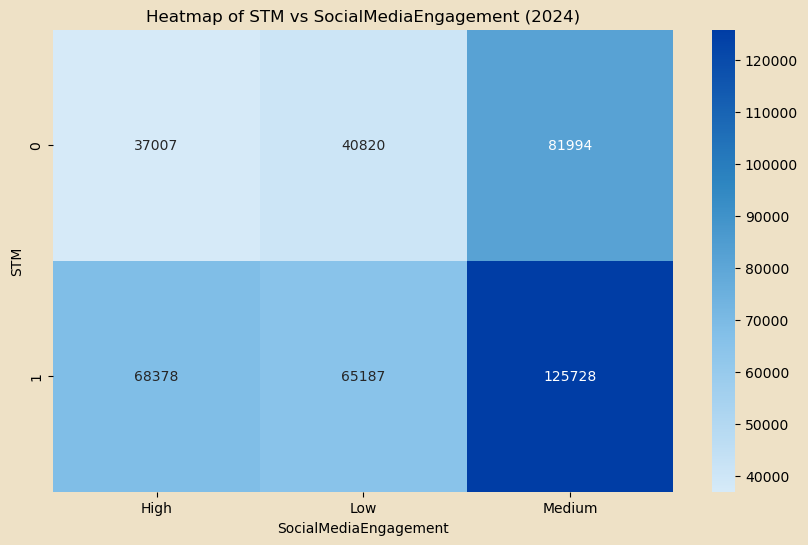

In [120]:
# producing a frequency table
heatmap = pd.crosstab(filtered_df_2024['STM'], filtered_df_2024['SocialMediaEngagement'])

# defining a color map scheme
bblue_cmap = LinearSegmentedColormap.from_list("bucks_blue",  ["#D6EAF8", "#85C1E9", "#2E86C1", "#003DA5"])

# plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap, annot=True, fmt="d", cmap=bblue_cmap)
plt.title("Heatmap of STM vs SocialMediaEngagement (2024)")
sns.set_style( {'figure.facecolor': '#EEE1C6'})

 # saving the figure
plt.savefig(f"C:/Users/galvanm/python/BucksHackathon25/BucksPlots/stm_vs_engagement_heatmap_2024.png", dpi=300, 
            bbox_inches='tight')